<a href="https://colab.research.google.com/github/gpriya32/Store-Item-Demand-Forecasting-Challenge/blob/master/time_series_analysis_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go

# Exploratory Data Analysis

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Starting with Dataset**

In [31]:
# print(os.getcwd())
# print(os.path.abspath('../input'))
train_data=pd.read_csv('/content/drive/My Drive/DATASETS/train.csv',parse_dates=['date'])

In [32]:
print(train_data.info())
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB
None
               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000


In [33]:
train_data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [34]:
train_data=train_data.sort_values(['date'])
train_data

,date,store,item,sales
0,2013-01-01,1,1,13
211816,2013-01-01,7,12,26
832656,2013-01-01,7,46,27
213642,2013-01-01,8,12,54
215468,2013-01-01,9,12,35
...,...,...,...,...
619013,2017-12-31,9,34,21
620839,2017-12-31,10,34,32
622665,2017-12-31,1,35,55
598927,2017-12-31,8,33,100


# Relation between date and sale


Trend of Sales across different time

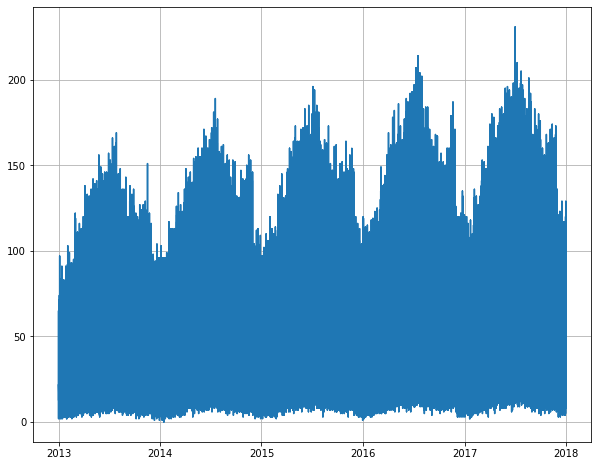

In [35]:
# plotting using plt
plt.figure(figsize=(10,8))
# garph showing yearly sales
plt.plot(train_data['date'],train_data['sales'])
plt.grid()
plt.show()

In [10]:
#plotting using plotly(see on kaggle)
fig=go.Figure(go.Scatter(x=train_data.date,y=train_data.sales))
fig.show()

## Relation between 50 items and their sales

Showing relationship between item and their sales

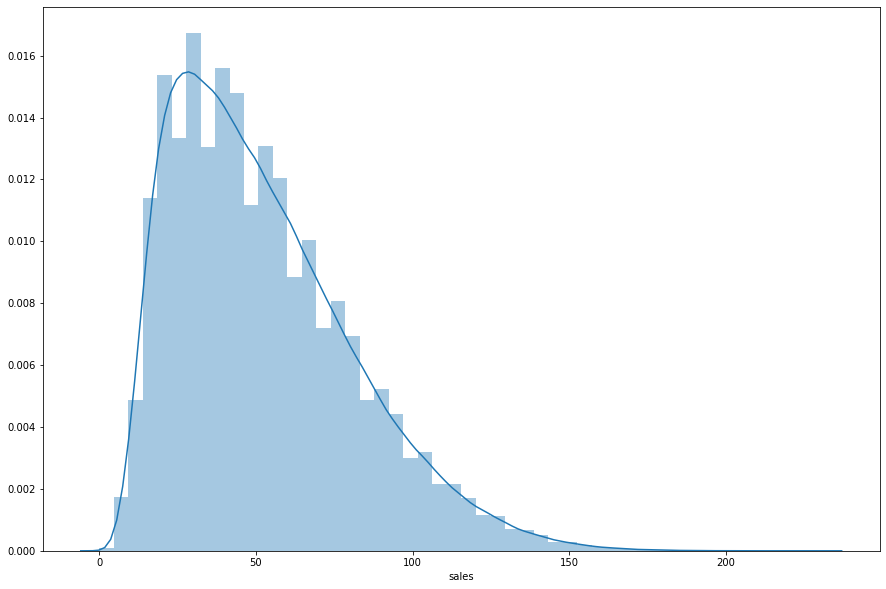

In [36]:
#dataset of item and sales
sales_vs_item=train_data[['item','sales']]
# indexed with items
sales_vs_item.set_index('item',inplace=True)

plt.figure(figsize=(15,10))
sns.distplot(sales_vs_item['sales'])
# maximum no of products  lies between 30 to 50

1. Cost corresponding to each item
       a)showing demand of different items
       b)as we can see some items has high demand in comparision to other

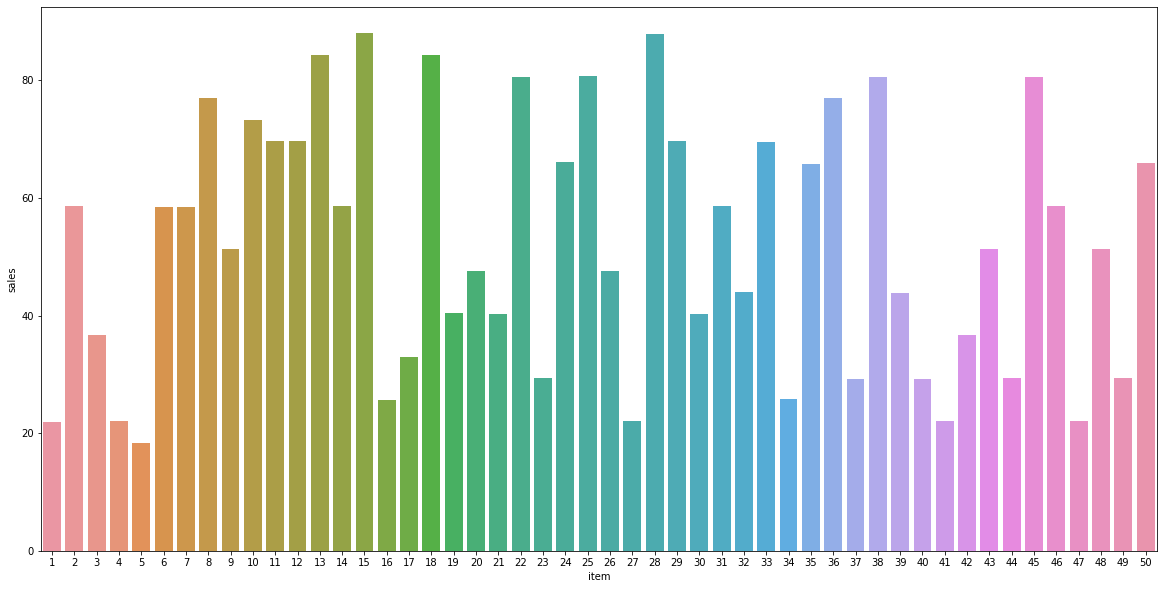

In [27]:
# grouping sales on the basis of items 
# mean of sales is calculated per item
data=sales_vs_item.groupby(['item']).mean()
# plotting average sales per item
plt.figure(figsize=(20,10))
sns.barplot(data.index,data['sales'])

## Sales acoording to month and year

2. indexed_data has sorted out number of items that were sold on a particular date, corresponding to each store 

In [37]:
# indexing data on the basis of date, store and item 
# showing sales of different items at different stores on every date
indexed_data=train_data.set_index(['date','store','item'])
indexed_data

sales
date       store item       
2013-01-01 1     1        13
           7     12       26
                 46       27
           8     12       54
           9     12       35
...                      ...
2017-12-31 9     34       21
           10    34       32
           1     35       55
           8     33      100
           10    50       82

[913000 rows x 1 columns]

3.Sales across 12 months of every year

Trend is same across each year , showing sales are almost sales is almost same every year

<Figure size 720x2160 with 0 Axes>

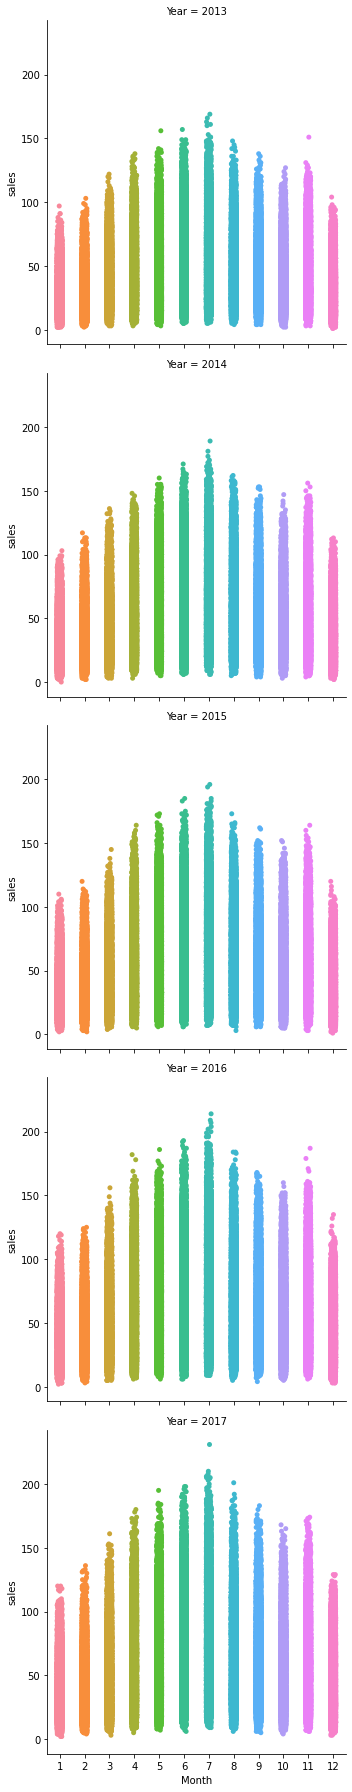

In [38]:
# Sales trend over the months and year
train_data['Month']=train_data['date'].dt.month
train_data['Year']=train_data['date'].dt.year
# figure showing sales across each month for different years 
plt.figure(figsize=(10,30))
sns.catplot(data = train_data, x ='Month', y = "sales",row = "Year")
plt.show()

## Let us understand the sales data distribution across the stores

In [39]:
# table showing average sales of each item of each store
store_df = train_data.copy()
sales_pivoted_df = pd.pivot_table(store_df, index='store', values=['sales'], columns='item', aggfunc=np.mean)
# Pivoted dataframe
display(sales_pivoted_df)

sales                        ...                                 
item          1          2          3   ...         48         49         50
store                                   ...                                 
1      19.971522  53.148959  33.208105  ...  46.546002  26.461665  59.342826
2      28.173604  75.316539  46.992333  ...  66.028478  37.711939  84.622125
3      25.070099  66.804491  41.771084  ...  58.700986  33.259584  74.958379
4      22.938664  61.715225  38.548193  ...  53.765608  30.840635  68.921687
5      16.739321  44.488499  27.835706  ...  39.281490  22.371851  50.319277
6      16.717963  44.533954  27.811062  ...  39.052574  22.181271  50.516429
7      15.159365  40.717963  25.531216  ...  35.624315  20.406353  45.823658
8      26.983571  71.656627  45.076123  ...  62.737130  36.035049  80.972070
9      23.325849  61.792442  38.535049  ...  53.976999  31.052574  69.308324
10     24.736035  65.566813  41.113363  ...  57.814896  33.032311  74.037240

[10 rows x 50 columns]

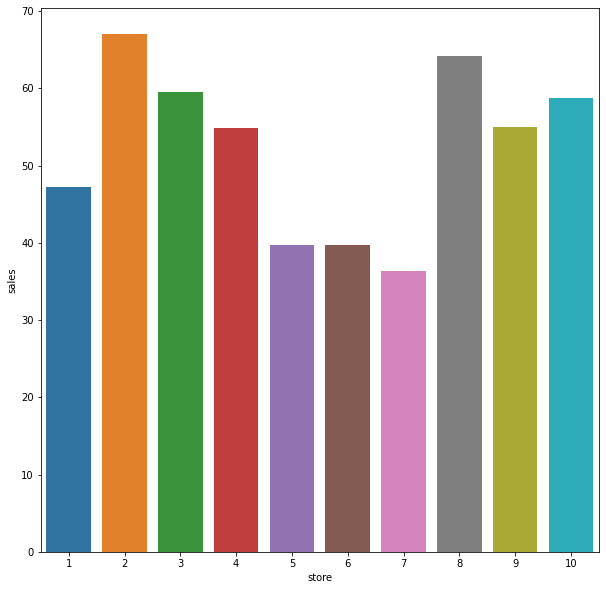

In [40]:
# Plotting average sales for each store 
store_data=train_data[['store','sales']]
store_data.set_index('store',inplace=True)
store_data=store_data.groupby('store').mean()
plt.figure(figsize=(10,10))
sns.barplot(store_data.index,store_data['sales'])

# Time Series Analysis

In [ ]:
# performing time series analysis for particular item of store
# print(train_data)
print('Before Filtering '+str(train_data.shape))
# let consider particular item and store
# store=10
# item=40

sample=train_data[train_data.store==10]
sample=sample[sample.item==40]
print('After Filtering '+str(sample.shape))
# print(sample)
py.iplot([go.Scatter(
    x=sample.date,
    y=sample.sales)])

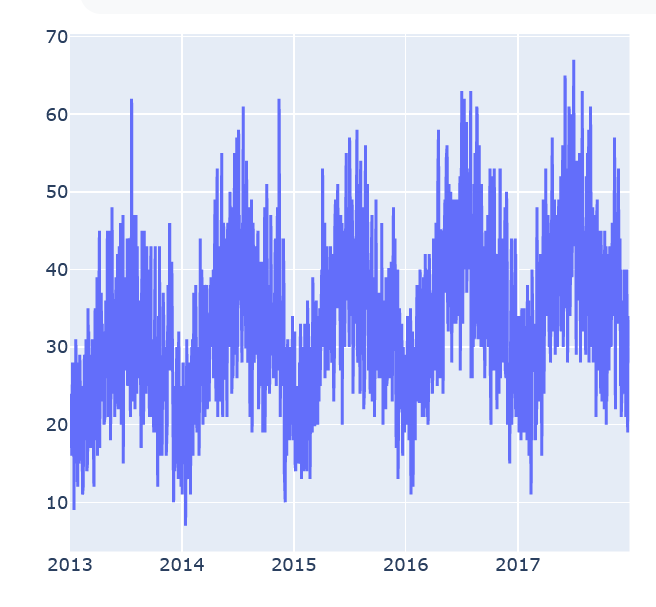

The above graph shows a sinosodal or seasonal trend. As you can see, sales were high during mid year and at the end of year.
Lets continue same exploration with other stores and items.

In [ ]:
print('Before Filtering '+str(train_data.shape))

item=[10,20,25,45]
store=[1,5,8,9]
sample=train_data.copy()
sample=sample[sample.item.isin(item)]
sample=sample[sample.store.isin(store)]

print('After Filtering '+str(train_data.shape))

multi_data = []
for i in range(0,4):
    flt = sample[sample.store == store[i]]
    flt = flt[flt.item == item[i]]
    multi_data.append(go.Scatter(x=flt.date, y=flt.sales, name = "Store:" + str(store[i]) + ",Item:" + str(item[i])))
py.iplot(multi_data)

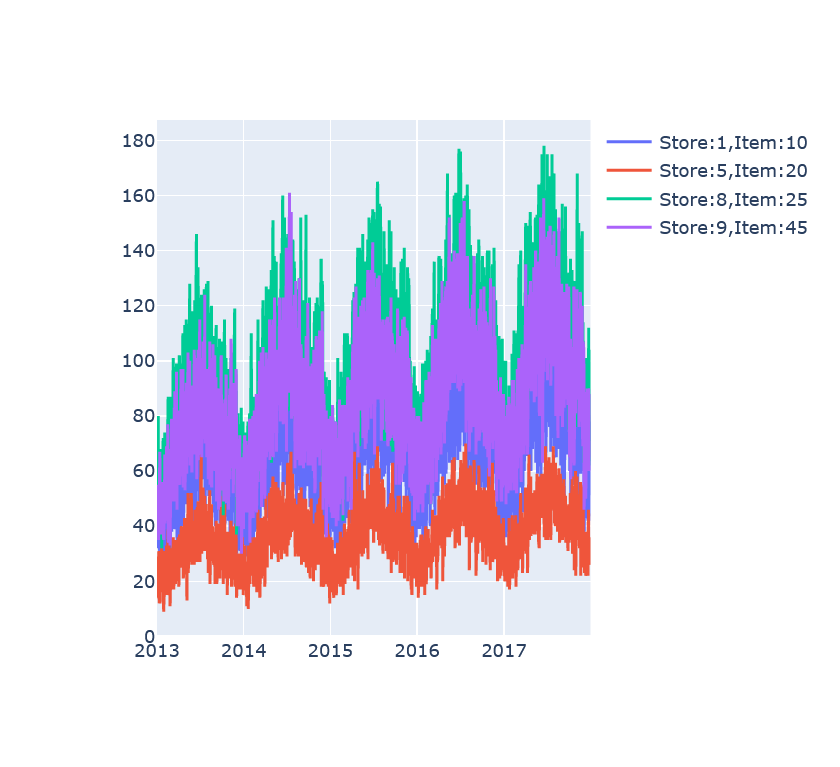

As you can see the seaasonal trend is available in sales of all the items of all the store hence we can conclude that it going to follow this trend for results too.

# Evaluating Model

In [41]:
# Renaming columns
train_data=train_data.rename(columns={'date':'ds','sales':'y'})
train_data

,ds,store,item,y,Month,Year
0,2013-01-01,1,1,13,1,2013
211816,2013-01-01,7,12,26,1,2013
832656,2013-01-01,7,46,27,1,2013
213642,2013-01-01,8,12,54,1,2013
215468,2013-01-01,9,12,35,1,2013
...,...,...,...,...,...,...
619013,2017-12-31,9,34,21,12,2017
620839,2017-12-31,10,34,32,12,2017
622665,2017-12-31,1,35,55,12,2017
598927,2017-12-31,8,33,100,12,2017


In [42]:
# using propret for analysis
model=Prophet(yearly_seasonality=True)
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
# focasting future through propret
forecast=model.make_future_dataframe(periods=90)
forecast=model.predict(forecast)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,26.760046,-8.231005,60.059572
1,2013-01-02,26.791287,-6.852487,58.455829
2,2013-01-03,30.022893,-4.149062,59.770009
3,2013-01-04,33.324678,-0.095341,67.284420
4,2013-01-05,36.691746,3.034711,68.983508
...,...,...,...,...
1911,2018-03-27,54.933405,21.117834,86.460640
1912,2018-03-28,55.340600,22.287199,88.573129
1913,2018-03-29,58.972904,23.562321,92.700117
1914,2018-03-30,62.697232,28.727480,95.386044


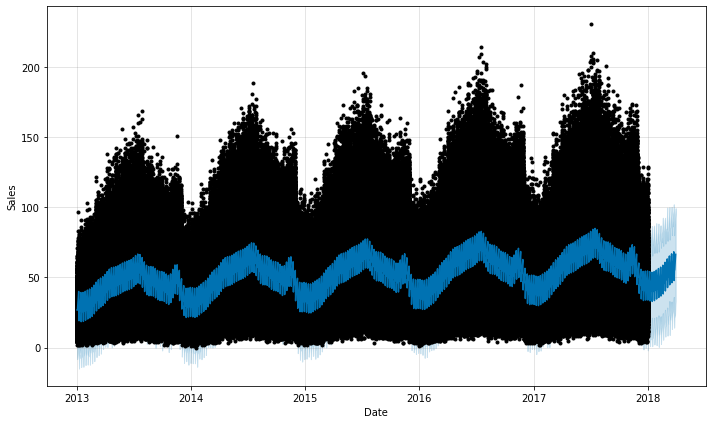

In [44]:
# plotting the forecast for next 3 months
figure=model.plot(forecast,xlabel='Date',ylabel='Sales')

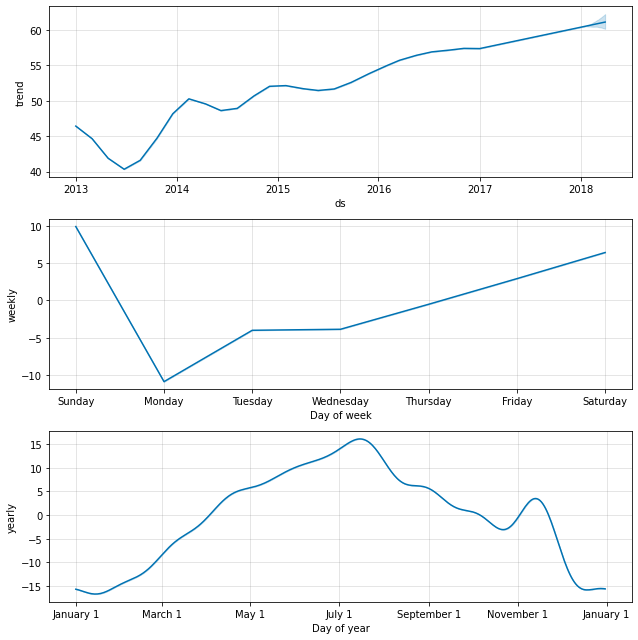

In [51]:
# plotting different components of forecast
figure2=model.plot_components(forecast)

1. Above, first plot shows total sales are increasing on yearly basis.
2. Second plot shows weekly trend, sales on everyday of week. Also, sales on monday is highly low.
3. Third plot shows yearly trend, as you can see during months july, august, december the sales are high as compared to other months of year. So, we can conclude that sales are high in months, during which we have holidays or festivals like christmas.

# Pedictions

In [45]:
# prediction function for each item and store
def predictions(item,store):
        # prophet hyperparameter tuning
        pg=Prophet(yearly_seasonality=True)
        # extracting data for particular store and item
        test=train_data[train_data.store==store]
        test=test[test.item==item]
        # fitting the model on data
        pg.fit(test)
        # making future predictions for next 90 days
        future=pg.make_future_dataframe(periods=90)
        # forecasting future
        forecast=pg.predict(future)
        # extracting result for 2018 only
        forecast_final=forecast[forecast['ds'].dt.year==2018]
        return forecast_final[['ds','yhat']]

In [46]:
# results contain predictions for each store and item
results=list()
for i in range(1,11):
    for j in range(1,51):
      # fecting result
        result=predictions(j,i)
        print(result)
        results.append(result['yhat'].values)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  12.984149
1827 2018-01-02  15.639140
1828 2018-01-03  16.282254
1829 2018-01-04  16.943207
1830 2018-01-05  18.492355
...         ...        ...
1911 2018-03-27  20.583067
1912 2018-03-28  21.259960
1913 2018-03-29  21.971071
1914 2018-03-30  23.586938
1915 2018-03-31  25.599176

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.700931
1827 2018-01-02  43.571075
1828 2018-01-03  44.419567
1829 2018-01-04  47.217837
1830 2018-01-05  50.565728
...         ...        ...
1911 2018-03-27  56.712099
1912 2018-03-28  57.877518
1913 2018-03-29  61.021764
1914 2018-03-30  64.740402
1915 2018-03-31  68.904635

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.233768
1827 2018-01-02  25.778465
1828 2018-01-03  26.372704
1829 2018-01-04  28.252483
1830 2018-01-05  30.964949
...         ...        ...
1911 2018-03-27  35.227039
1912 2018-03-28  35.907440
1913 2018-03-29  37.871024
1914 2018-03-30  40.666426
1915 2018-03-31  42.643150

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.110524
1827 2018-01-02  16.093624
1828 2018-01-03  16.107741
1829 2018-01-04  18.007105
1830 2018-01-05  18.359100
...         ...        ...
1911 2018-03-27  20.967045
1912 2018-03-28  21.097687
1913 2018-03-29  23.132526
1914 2018-03-30  23.638762
1915 2018-03-31  25.670454

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.782970
1827 2018-01-02  13.046648
1828 2018-01-03  13.387547
1829 2018-01-04  14.936891
1830 2018-01-05  15.279824
...         ...        ...
1911 2018-03-27  18.023525
1912 2018-03-28  18.399558
1913 2018-03-29  19.983723
1914 2018-03-30  20.362001
1915 2018-03-31  21.695210

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.697386
1827 2018-01-02  43.075231
1828 2018-01-03  43.451023
1829 2018-01-04  45.445172
1830 2018-01-05  49.764283
...         ...        ...
1911 2018-03-27  56.852520
1912 2018-03-28  57.460746
1913 2018-03-29  59.714795
1914 2018-03-30  64.319260
1915 2018-03-31  68.300172

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.440149
1827 2018-01-02  40.462933
1828 2018-01-03  40.579489
1829 2018-01-04  44.701756
1830 2018-01-05  47.291755
...         ...        ...
1911 2018-03-27  55.680815
1912 2018-03-28  56.148570
1913 2018-03-29  60.633215
1914 2018-03-30  63.592293
1915 2018-03-31  69.007848

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.521125
1827 2018-01-02  57.712015
1828 2018-01-03  57.446420
1829 2018-01-04  61.479666
1830 2018-01-05  66.666971
...         ...        ...
1911 2018-03-27  76.628198
1912 2018-03-28  76.706315
1913 2018-03-29  81.102024
1914 2018-03-30  86.668763
1915 2018-03-31  91.466815

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.725081
1827 2018-01-02  34.448898
1828 2018-01-03  34.912609
1829 2018-01-04  38.179608
1830 2018-01-05  40.495883
...         ...        ...
1911 2018-03-27  47.793142
1912 2018-03-28  48.410850
1913 2018-03-29  51.847679
1914 2018-03-30  54.349041
1915 2018-03-31  58.424167

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  46.220641
1827 2018-01-02  54.977658
1828 2018-01-03  55.556631
1829 2018-01-04  60.184819
1830 2018-01-05  64.776566
...         ...        ...
1911 2018-03-27  71.245417
1912 2018-03-28  71.937844
1913 2018-03-29  76.729384
1914 2018-03-30  81.535914
1915 2018-03-31  85.430068

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.646505
1827 2018-01-02  51.365376
1828 2018-01-03  52.157343
1829 2018-01-04  55.304936
1830 2018-01-05  59.571395
...         ...        ...
1911 2018-03-27  67.123228
1912 2018-03-28  68.298572
1913 2018-03-29  71.879206
1914 2018-03-30  76.623046
1915 2018-03-31  81.999777

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.340420
1827 2018-01-02  50.341635
1828 2018-01-03  51.057841
1829 2018-01-04  54.661389
1830 2018-01-05  59.132226
...         ...        ...
1911 2018-03-27  68.307288
1912 2018-03-28  69.364852
1913 2018-03-29  73.321829
1914 2018-03-30  78.155248
1915 2018-03-31  81.803567

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.697985
1827 2018-01-02  60.721324
1828 2018-01-03  60.642300
1829 2018-01-04  63.849935
1830 2018-01-05  69.980597
...         ...        ...
1911 2018-03-27  80.830175
1912 2018-03-28  81.072930
1913 2018-03-29  84.621274
1914 2018-03-30  91.108608
1915 2018-03-31  96.072485

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.708978
1827 2018-01-02  42.890515
1828 2018-01-03  43.196277
1829 2018-01-04  45.820988
1830 2018-01-05  48.515000
...         ...        ...
1911 2018-03-27  57.440597
1912 2018-03-28  58.069322
1913 2018-03-29  61.038184
1914 2018-03-30  64.096447
1915 2018-03-31  69.050631

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   55.269824
1827 2018-01-02   65.744736
1828 2018-01-03   65.974353
1829 2018-01-04   71.152369
1830 2018-01-05   76.880115
...         ...         ...
1911 2018-03-27   85.175746
1912 2018-03-28   85.950385
1913 2018-03-29   91.732204
1914 2018-03-30   98.116043
1915 2018-03-31  102.903079

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.949195
1827 2018-01-02  18.196248
1828 2018-01-03  18.263383
1829 2018-01-04  19.824938
1830 2018-01-05  21.028817
...         ...        ...
1911 2018-03-27  25.210635
1912 2018-03-28  25.555040
1913 2018-03-29  27.396132
1914 2018-03-30  28.878034
1915 2018-03-31  31.566434

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.896163
1827 2018-01-02  23.066631
1828 2018-01-03  24.172116
1829 2018-01-04  25.170885
1830 2018-01-05  27.777393
...         ...        ...
1911 2018-03-27  30.279011
1912 2018-03-28  31.649110
1913 2018-03-29  32.933342
1914 2018-03-30  35.842697
1915 2018-03-31  37.758479

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  51.657153
1827 2018-01-02  62.430220
1828 2018-01-03  61.619448
1829 2018-01-04  66.729502
1830 2018-01-05  72.927552
...         ...        ...
1911 2018-03-27  80.832123
1912 2018-03-28  80.442178
1913 2018-03-29  86.015317
1914 2018-03-30  92.715619
1915 2018-03-31  98.193381

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.247249
1827 2018-01-02  29.933709
1828 2018-01-03  30.653713
1829 2018-01-04  31.888314
1830 2018-01-05  34.209802
...         ...        ...
1911 2018-03-27  39.412726
1912 2018-03-28  40.411784
1913 2018-03-29  41.932452
1914 2018-03-30  44.543629
1915 2018-03-31  48.116818

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.254745
1827 2018-01-02  34.737550
1828 2018-01-03  34.975079
1829 2018-01-04  37.289332
1830 2018-01-05  39.375406
...         ...        ...
1911 2018-03-27  47.441142
1912 2018-03-28  48.047290
1913 2018-03-29  50.726743
1914 2018-03-30  53.170236
1915 2018-03-31  57.149068

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.088081
1827 2018-01-02  29.396644
1828 2018-01-03  28.785526
1829 2018-01-04  32.370139
1830 2018-01-05  33.916961
...         ...        ...
1911 2018-03-27  39.488752
1912 2018-03-28  39.103003
1913 2018-03-29  42.922910
1914 2018-03-30  44.714035
1915 2018-03-31  47.368367

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.463816
1827 2018-01-02  58.977218
1828 2018-01-03  60.116105
1829 2018-01-04  63.987588
1830 2018-01-05  68.101055
...         ...        ...
1911 2018-03-27  76.341064
1912 2018-03-28  77.851657
1913 2018-03-29  82.155923
1914 2018-03-30  86.760058
1915 2018-03-31  92.939638

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.282938
1827 2018-01-02  22.026673
1828 2018-01-03  22.523905
1829 2018-01-04  23.712723
1830 2018-01-05  25.845481
...         ...        ...
1911 2018-03-27  28.966096
1912 2018-03-28  29.367595
1913 2018-03-29  30.481037
1914 2018-03-30  32.561768
1915 2018-03-31  34.907146

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  37.443952
1827 2018-01-02  45.731811
1828 2018-01-03  45.783807
1829 2018-01-04  49.467562
1830 2018-01-05  53.973599
...         ...        ...
1911 2018-03-27  63.098857
1912 2018-03-28  63.433990
1913 2018-03-29  67.394631
1914 2018-03-30  72.169599
1915 2018-03-31  76.054856

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.305712
1827 2018-01-02  58.660549
1828 2018-01-03  57.796873
1829 2018-01-04  62.383396
1830 2018-01-05  66.837340
...         ...        ...
1911 2018-03-27  76.661415
1912 2018-03-28  76.166563
1913 2018-03-29  81.163767
1914 2018-03-30  86.066652
1915 2018-03-31  91.330348

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.145340
1827 2018-01-02  34.677833
1828 2018-01-03  34.331529
1829 2018-01-04  37.430129
1830 2018-01-05  39.371069
...         ...        ...
1911 2018-03-27  47.469159
1912 2018-03-28  47.359300
1913 2018-03-29  50.712705
1914 2018-03-30  52.923662
1915 2018-03-31  57.286580

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.237100
1827 2018-01-02  16.418824
1828 2018-01-03  16.238596
1829 2018-01-04  17.593066
1830 2018-01-05  19.560824
...         ...        ...
1911 2018-03-27  21.025687
1912 2018-03-28  20.930663
1913 2018-03-29  22.400020
1914 2018-03-30  24.510944
1915 2018-03-31  24.757661

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   54.554067
1827 2018-01-02   65.030683
1828 2018-01-03   64.915966
1829 2018-01-04   70.186154
1830 2018-01-05   74.945881
...         ...         ...
1911 2018-03-27   85.549615
1912 2018-03-28   85.947639
1913 2018-03-29   91.754408
1914 2018-03-30   97.069334
1915 2018-03-31  103.631312

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.570262
1827 2018-01-02  51.082059
1828 2018-01-03  51.888955
1829 2018-01-04  56.021452
1830 2018-01-05  59.282934
...         ...        ...
1911 2018-03-27  65.308332
1912 2018-03-28  66.393891
1913 2018-03-29  70.855430
1914 2018-03-30  74.493298
1915 2018-03-31  80.064817

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.926722
1827 2018-01-02  29.818661
1828 2018-01-03  29.795625
1829 2018-01-04  32.324687
1830 2018-01-05  34.643243
...         ...        ...
1911 2018-03-27  40.217705
1912 2018-03-28  40.172717
1913 2018-03-29  42.704360
1914 2018-03-30  45.052272
1915 2018-03-31  48.126571

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.586622
1827 2018-01-02  41.928598
1828 2018-01-03  42.191263
1829 2018-01-04  45.061802
1830 2018-01-05  48.612140
...         ...        ...
1911 2018-03-27  56.735525
1912 2018-03-28  57.322841
1913 2018-03-29  60.529680
1914 2018-03-30  64.424503
1915 2018-03-31  67.799381

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.348508
1827 2018-01-02  31.817938
1828 2018-01-03  31.968688
1829 2018-01-04  33.945837
1830 2018-01-05  37.095343
...         ...        ...
1911 2018-03-27  43.211860
1912 2018-03-28  43.623203
1913 2018-03-29  45.875075
1914 2018-03-30  49.312326
1915 2018-03-31  52.118369

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.289855
1827 2018-01-02  52.528478
1828 2018-01-03  52.424975
1829 2018-01-04  56.111122
1830 2018-01-05  60.758588
...         ...        ...
1911 2018-03-27  67.649153
1912 2018-03-28  67.863091
1913 2018-03-29  71.915143
1914 2018-03-30  76.973395
1915 2018-03-31  81.661388

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.941814
1827 2018-01-02  19.010497
1828 2018-01-03  19.068298
1829 2018-01-04  20.917054
1830 2018-01-05  22.188693
...         ...        ...
1911 2018-03-27  24.807578
1912 2018-03-28  24.922139
1913 2018-03-29  26.827654
1914 2018-03-30  28.157400
1915 2018-03-31  29.908805

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.926480
1827 2018-01-02  47.610365
1828 2018-01-03  47.761259
1829 2018-01-04  51.504459
1830 2018-01-05  55.518871
...         ...        ...
1911 2018-03-27  62.902958
1912 2018-03-28  63.388660
1913 2018-03-29  67.474565
1914 2018-03-30  71.837432
1915 2018-03-31  76.322627

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  46.823104
1827 2018-01-02  55.552680
1828 2018-01-03  55.679616
1829 2018-01-04  60.101956
1830 2018-01-05  65.394776
...         ...        ...
1911 2018-03-27  72.699721
1912 2018-03-28  73.153608
1913 2018-03-29  77.965243
1914 2018-03-30  83.705661
1915 2018-03-31  88.408613

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.985822
1827 2018-01-02  20.711755
1828 2018-01-03  20.632559
1829 2018-01-04  22.604769
1830 2018-01-05  24.104101
...         ...        ...
1911 2018-03-27  27.739020
1912 2018-03-28  27.868596
1913 2018-03-29  30.050893
1914 2018-03-30  31.758565
1915 2018-03-31  33.522050

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.880149
1827 2018-01-02  58.437857
1828 2018-01-03  59.681162
1829 2018-01-04  64.203949
1830 2018-01-05  69.411004
...         ...        ...
1911 2018-03-27  79.133940
1912 2018-03-28  80.842518
1913 2018-03-29  85.827254
1914 2018-03-30  91.487513
1915 2018-03-31  95.835646

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.246983
1827 2018-01-02  31.639852
1828 2018-01-03  32.238558
1829 2018-01-04  33.956238
1830 2018-01-05  36.517540
...         ...        ...
1911 2018-03-27  41.978041
1912 2018-03-28  42.956716
1913 2018-03-29  45.078999
1914 2018-03-30  48.063433
1915 2018-03-31  51.309937

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.134196
1827 2018-01-02  21.314545
1828 2018-01-03  21.915383
1829 2018-01-04  23.862205
1830 2018-01-05  24.661280
...         ...        ...
1911 2018-03-27  27.998534
1912 2018-03-28  28.800548
1913 2018-03-29  30.952780
1914 2018-03-30  31.959133
1915 2018-03-31  34.794839

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.122249
1827 2018-01-02  16.701706
1828 2018-01-03  16.747610
1829 2018-01-04  17.606788
1830 2018-01-05  19.233377
...         ...        ...
1911 2018-03-27  21.224973
1912 2018-03-28  21.481966
1913 2018-03-29  22.575678
1914 2018-03-30  24.457188
1915 2018-03-31  26.261250

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.051814
1827 2018-01-02  24.890847
1828 2018-01-03  25.644226
1829 2018-01-04  27.350003
1830 2018-01-05  29.390753
...         ...        ...
1911 2018-03-27  35.531889
1912 2018-03-28  36.483594
1913 2018-03-29  38.371898
1914 2018-03-30  40.577685
1915 2018-03-31  42.823007

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.405068
1827 2018-01-02  37.242606
1828 2018-01-03  38.224809
1829 2018-01-04  40.634541
1830 2018-01-05  43.535784
...         ...        ...
1911 2018-03-27  47.600848
1912 2018-03-28  48.924849
1913 2018-03-29  51.727817
1914 2018-03-30  55.070831
1915 2018-03-31  58.485506

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.861779
1827 2018-01-02  22.472097
1828 2018-01-03  22.248928
1829 2018-01-04  24.508558
1830 2018-01-05  25.762341
...         ...        ...
1911 2018-03-27  29.823524
1912 2018-03-28  29.790105
1913 2018-03-29  32.247122
1914 2018-03-30  33.702363
1915 2018-03-31  35.782366

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.319027
1827 2018-01-02  57.841406
1828 2018-01-03  58.069521
1829 2018-01-04  61.851362
1830 2018-01-05  67.372755
...         ...        ...
1911 2018-03-27  76.561552
1912 2018-03-28  77.046766
1913 2018-03-29  81.102912
1914 2018-03-30  86.914529
1915 2018-03-31  91.271578

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.977587
1827 2018-01-02  42.627402
1828 2018-01-03  43.230236
1829 2018-01-04  47.017527
1830 2018-01-05  50.561427
...         ...        ...
1911 2018-03-27  55.995024
1912 2018-03-28  56.918098
1913 2018-03-29  61.043188
1914 2018-03-30  64.938422
1915 2018-03-31  68.060606

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.662228
1827 2018-01-02  16.242602
1828 2018-01-03  16.481834
1829 2018-01-04  17.714168
1830 2018-01-05  18.649971
...         ...        ...
1911 2018-03-27  21.498144
1912 2018-03-28  21.799820
1913 2018-03-29  23.103367
1914 2018-03-30  24.118202
1915 2018-03-31  25.392661

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.275137
1827 2018-01-02  37.843785
1828 2018-01-03  37.232490
1829 2018-01-04  40.530306
1830 2018-01-05  44.003480
...         ...        ...
1911 2018-03-27  51.109811
1912 2018-03-28  50.616367
1913 2018-03-29  54.044980
1914 2018-03-30  57.661086
1915 2018-03-31  60.197359

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.430805
1827 2018-01-02  21.490188
1828 2018-01-03  21.158782
1829 2018-01-04  23.966025
1830 2018-01-05  24.622781
...         ...        ...
1911 2018-03-27  28.214798
1912 2018-03-28  28.135920
1913 2018-03-29  31.208368
1914 2018-03-30  32.139264
1915 2018-03-31  34.271557

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.436795
1827 2018-01-02  47.253412
1828 2018-01-03  48.129190
1829 2018-01-04  51.231788
1830 2018-01-05  54.754919
...         ...        ...
1911 2018-03-27  62.868427
1912 2018-03-28  64.040128
1913 2018-03-29  67.457338
1914 2018-03-30  71.312290
1915 2018-03-31  76.498099

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.931698
1827 2018-01-02  23.017388
1828 2018-01-03  22.613033
1829 2018-01-04  25.158189
1830 2018-01-05  27.607948
...         ...        ...
1911 2018-03-27  29.774250
1912 2018-03-28  29.510820
1913 2018-03-29  32.216217
1914 2018-03-30  34.843985
1915 2018-03-31  36.443385

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.229448
1827 2018-01-02  58.659274
1828 2018-01-03  58.795817
1829 2018-01-04  63.507545
1830 2018-01-05  68.626035
...         ...        ...
1911 2018-03-27  78.517989
1912 2018-03-28  79.145855
1913 2018-03-29  84.381916
1914 2018-03-30  90.052738
1915 2018-03-31  94.072236

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.280597
1827 2018-01-02  37.992240
1828 2018-01-03  38.778740
1829 2018-01-04  41.446491
1830 2018-01-05  45.365702
...         ...        ...
1911 2018-03-27  49.352361
1912 2018-03-28  50.295247
1913 2018-03-29  53.159280
1914 2018-03-30  57.313582
1915 2018-03-31  60.720366

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.204966
1827 2018-01-02  22.568599
1828 2018-01-03  22.411957
1829 2018-01-04  23.623091
1830 2018-01-05  26.012027
...         ...        ...
1911 2018-03-27  30.546811
1912 2018-03-28  30.577512
1913 2018-03-29  31.982121
1914 2018-03-30  34.568668
1915 2018-03-31  35.995621

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.683442
1827 2018-01-02  18.521947
1828 2018-01-03  18.725639
1829 2018-01-04  20.352923
1830 2018-01-05  22.207929
...         ...        ...
1911 2018-03-27  25.403592
1912 2018-03-28  25.642393
1913 2018-03-29  27.298508
1914 2018-03-30  29.177009
1915 2018-03-31  30.661500

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.549507
1827 2018-01-02  58.364422
1828 2018-01-03  58.310523
1829 2018-01-04  62.957463
1830 2018-01-05  67.828032
...         ...        ...
1911 2018-03-27  77.511509
1912 2018-03-28  77.873548
1913 2018-03-29  82.979956
1914 2018-03-30  88.349083
1915 2018-03-31  93.934475

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.798972
1827 2018-01-02  60.878617
1828 2018-01-03  61.635528
1829 2018-01-04  65.170048
1830 2018-01-05  69.963574
...         ...        ...
1911 2018-03-27  82.029480
1912 2018-03-28  83.294392
1913 2018-03-29  87.362570
1914 2018-03-30  92.707468
1915 2018-03-31  99.790850

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.417036
1827 2018-01-02   79.439303
1828 2018-01-03   79.068019
1829 2018-01-04   85.812079
1830 2018-01-05   92.967928
...         ...         ...
1911 2018-03-27  105.724566
1912 2018-03-28  105.815077
1913 2018-03-29  113.038088
1914 2018-03-30  120.688395
1915 2018-03-31  126.946008

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.715578
1827 2018-01-02  50.464693
1828 2018-01-03  49.997530
1829 2018-01-04  54.673819
1830 2018-01-05  59.128653
...         ...        ...
1911 2018-03-27  70.432051
1912 2018-03-28  70.335420
1913 2018-03-29  75.396423
1914 2018-03-30  80.247149
1915 2018-03-31  84.281872

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   63.669702
1827 2018-01-02   76.102007
1828 2018-01-03   78.329272
1829 2018-01-04   83.567763
1830 2018-01-05   89.901626
...         ...         ...
1911 2018-03-27   99.553108
1912 2018-03-28  102.068838
1913 2018-03-29  107.652897
1914 2018-03-30  114.388665
1915 2018-03-31  120.910688

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.226235
1827 2018-01-02   71.717002
1828 2018-01-03   71.401738
1829 2018-01-04   77.249710
1830 2018-01-05   83.572259
...         ...         ...
1911 2018-03-27   95.672177
1912 2018-03-28   95.895675
1913 2018-03-29  102.328640
1914 2018-03-30  109.276055
1915 2018-03-31  114.368026

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.377841
1827 2018-01-02   70.655833
1828 2018-01-03   71.335146
1829 2018-01-04   77.726174
1830 2018-01-05   81.661161
...         ...         ...
1911 2018-03-27   94.357193
1912 2018-03-28   95.886580
1913 2018-03-29  103.165659
1914 2018-03-30  108.014503
1915 2018-03-31  115.317608

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   69.545118
1827 2018-01-02   83.997123
1828 2018-01-03   85.366616
1829 2018-01-04   91.947805
1830 2018-01-05   98.711527
...         ...         ...
1911 2018-03-27  113.584309
1912 2018-03-28  115.201177
1913 2018-03-29  122.077772
1914 2018-03-30  129.186733
1915 2018-03-31  136.994076

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  51.448708
1827 2018-01-02  60.865633
1828 2018-01-03  60.379407
1829 2018-01-04  65.508670
1830 2018-01-05  69.756568
...         ...        ...
1911 2018-03-27  80.529645
1912 2018-03-28  80.686942
1913 2018-03-29  86.484921
1914 2018-03-30  91.417938
1915 2018-03-31  97.297877

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   75.320842
1827 2018-01-02   90.248500
1828 2018-01-03   90.311371
1829 2018-01-04   98.735431
1830 2018-01-05  104.778749
...         ...         ...
1911 2018-03-27  118.861725
1912 2018-03-28  119.442560
1913 2018-03-29  128.458315
1914 2018-03-30  135.161364
1915 2018-03-31  144.174834

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.741144
1827 2018-01-02  26.879364
1828 2018-01-03  26.349389
1829 2018-01-04  28.113610
1830 2018-01-05  30.597719
...         ...        ...
1911 2018-03-27  34.946055
1912 2018-03-28  34.497248
1913 2018-03-29  36.368587
1914 2018-03-30  38.985115
1915 2018-03-31  41.399733

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.926690
1827 2018-01-02  33.315358
1828 2018-01-03  33.342436
1829 2018-01-04  36.458628
1830 2018-01-05  39.058084
...         ...        ...
1911 2018-03-27  44.385881
1912 2018-03-28  44.753969
1913 2018-03-29  48.225712
1914 2018-03-30  51.190451
1915 2018-03-31  54.569479

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   72.082754
1827 2018-01-02   86.182153
1828 2018-01-03   86.864188
1829 2018-01-04   94.067485
1830 2018-01-05  100.418779
...         ...         ...
1911 2018-03-27  118.031238
1912 2018-03-28  119.268701
1913 2018-03-29  127.031924
1914 2018-03-30  133.942271
1915 2018-03-31  141.264622

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.175861
1827 2018-01-02  41.978508
1828 2018-01-03  42.041275
1829 2018-01-04  46.562682
1830 2018-01-05  49.001262
...         ...        ...
1911 2018-03-27  55.765043
1912 2018-03-28  56.064419
1913 2018-03-29  60.859204
1914 2018-03-30  63.604855
1915 2018-03-31  67.047600

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.826813
1827 2018-01-02  47.993013
1828 2018-01-03  48.213427
1829 2018-01-04  52.595598
1830 2018-01-05  56.735850
...         ...        ...
1911 2018-03-27  64.453843
1912 2018-03-28  64.976098
1913 2018-03-29  69.704765
1914 2018-03-30  74.233463
1915 2018-03-31  78.668719

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.204722
1827 2018-01-02  40.843895
1828 2018-01-03  41.284366
1829 2018-01-04  44.294872
1830 2018-01-05  47.181494
...         ...        ...
1911 2018-03-27  55.442200
1912 2018-03-28  56.116214
1913 2018-03-29  59.381073
1914 2018-03-30  62.542401
1915 2018-03-31  67.549403

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   67.585059
1827 2018-01-02   81.141775
1828 2018-01-03   80.180988
1829 2018-01-04   87.757649
1830 2018-01-05   94.084316
...         ...         ...
1911 2018-03-27  110.179948
1912 2018-03-28  109.721468
1913 2018-03-29  117.804906
1914 2018-03-30  124.639597
1915 2018-03-31  131.963835

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.810281
1827 2018-01-02  30.314183
1828 2018-01-03  31.394722
1829 2018-01-04  33.288411
1830 2018-01-05  35.535425
...         ...        ...
1911 2018-03-27  40.918632
1912 2018-03-28  42.097546
1913 2018-03-29  44.089586
1914 2018-03-30  46.435479
1915 2018-03-31  48.649210

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.441521
1827 2018-01-02   67.460267
1828 2018-01-03   67.846358
1829 2018-01-04   73.264987
1830 2018-01-05   78.840009
...         ...         ...
1911 2018-03-27   92.148374
1912 2018-03-28   92.948702
1913 2018-03-29   98.794772
1914 2018-03-30  104.807437
1915 2018-03-31  110.229892

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   67.015821
1827 2018-01-02   81.974064
1828 2018-01-03   82.514176
1829 2018-01-04   89.812725
1830 2018-01-05   96.350715
...         ...         ...
1911 2018-03-27  109.031724
1912 2018-03-28  110.169196
1913 2018-03-29  118.117419
1914 2018-03-30  125.352704
1915 2018-03-31  132.304971

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.405223
1827 2018-01-02  50.069435
1828 2018-01-03  49.763104
1829 2018-01-04  53.940492
1830 2018-01-05  57.816264
...         ...        ...
1911 2018-03-27  64.600559
1912 2018-03-28  64.497219
1913 2018-03-29  68.934555
1914 2018-03-30  73.124863
1915 2018-03-31  78.605113

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.606954
1827 2018-01-02  23.615197
1828 2018-01-03  23.123291
1829 2018-01-04  25.301187
1830 2018-01-05  26.801475
...         ...        ...
1911 2018-03-27  30.574673
1912 2018-03-28  30.174565
1913 2018-03-29  32.461230
1914 2018-03-30  34.086904
1915 2018-03-31  36.382152

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   74.849380
1827 2018-01-02   89.263234
1828 2018-01-03   89.963380
1829 2018-01-04   97.458841
1830 2018-01-05  105.040140
...         ...         ...
1911 2018-03-27  120.498623
1912 2018-03-28  121.655180
1913 2018-03-29  129.646740
1914 2018-03-30  137.762338
1915 2018-03-31  145.229719

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.911253
1827 2018-01-02   71.451945
1828 2018-01-03   72.167295
1829 2018-01-04   77.431938
1830 2018-01-05   82.807768
...         ...         ...
1911 2018-03-27   95.248512
1912 2018-03-28   96.590559
1913 2018-03-29  102.521385
1914 2018-03-30  108.594842
1915 2018-03-31  114.839350

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.647334
1827 2018-01-02  41.863735
1828 2018-01-03  42.101311
1829 2018-01-04  45.723069
1830 2018-01-05  49.749362
...         ...        ...
1911 2018-03-27  54.679287
1912 2018-03-28  55.320945
1913 2018-03-29  59.387415
1914 2018-03-30  63.893367
1915 2018-03-31  66.558091

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.659128
1827 2018-01-02  60.046220
1828 2018-01-03  59.821277
1829 2018-01-04  64.268429
1830 2018-01-05  68.725985
...         ...        ...
1911 2018-03-27  79.578833
1912 2018-03-28  79.919857
1913 2018-03-29  84.972492
1914 2018-03-30  90.068573
1915 2018-03-31  95.987459

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.651848
1827 2018-01-02  46.067127
1828 2018-01-03  47.018641
1829 2018-01-04  49.926822
1830 2018-01-05  53.491826
...         ...        ...
1911 2018-03-27  61.819521
1912 2018-03-28  63.141254
1913 2018-03-29  66.417316
1914 2018-03-30  70.346074
1915 2018-03-31  74.150911

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.638814
1827 2018-01-02   68.662022
1828 2018-01-03   67.886684
1829 2018-01-04   73.522664
1830 2018-01-05   80.127469
...         ...         ...
1911 2018-03-27   92.338597
1912 2018-03-28   92.083574
1913 2018-03-29   98.257371
1914 2018-03-30  105.413338
1915 2018-03-31  111.606672

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.857199
1827 2018-01-02  27.909668
1828 2018-01-03  27.928216
1829 2018-01-04  29.757138
1830 2018-01-05  31.670309
...         ...        ...
1911 2018-03-27  35.623878
1912 2018-03-28  35.793307
1913 2018-03-29  37.793867
1914 2018-03-30  39.898769
1915 2018-03-31  42.093665

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.849294
1827 2018-01-02   68.750873
1828 2018-01-03   69.250470
1829 2018-01-04   73.569140
1830 2018-01-05   79.561696
...         ...         ...
1911 2018-03-27   89.775551
1912 2018-03-28   90.749654
1913 2018-03-29   95.619001
1914 2018-03-30  102.231997
1915 2018-03-31  109.807759

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   65.938539
1827 2018-01-02   79.770531
1828 2018-01-03   78.920594
1829 2018-01-04   85.617279
1830 2018-01-05   91.474745
...         ...         ...
1911 2018-03-27  105.917797
1912 2018-03-28  105.653519
1913 2018-03-29  112.987240
1914 2018-03-30  119.528337
1915 2018-03-31  126.686249

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.322318
1827 2018-01-02  31.332340
1828 2018-01-03  31.042923
1829 2018-01-04  33.678630
1830 2018-01-05  34.797424
...         ...        ...
1911 2018-03-27  39.914556
1912 2018-03-28  39.717321
1913 2018-03-29  42.482916
1914 2018-03-30  43.769642
1915 2018-03-31  47.250204

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   69.356449
1827 2018-01-02   83.647658
1828 2018-01-03   83.464750
1829 2018-01-04   90.675734
1830 2018-01-05   97.267248
...         ...         ...
1911 2018-03-27  110.796913
1912 2018-03-28  110.915527
1913 2018-03-29  118.472362
1914 2018-03-30  125.453636
1915 2018-03-31  132.715364

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.859791
1827 2018-01-02  44.134717
1828 2018-01-03  43.658611
1829 2018-01-04  46.941053
1830 2018-01-05  51.101779
...         ...        ...
1911 2018-03-27  59.063942
1912 2018-03-28  58.805941
1913 2018-03-29  62.327910
1914 2018-03-30  66.749512
1915 2018-03-31  71.454981

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.705742
1827 2018-01-02  30.610418
1828 2018-01-03  31.648922
1829 2018-01-04  33.266977
1830 2018-01-05  36.738090
...         ...        ...
1911 2018-03-27  39.920910
1912 2018-03-28  41.064157
1913 2018-03-29  42.812457
1914 2018-03-30  46.440214
1915 2018-03-31  47.739247

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.340718
1827 2018-01-02  23.201470
1828 2018-01-03  23.304062
1829 2018-01-04  25.248271
1830 2018-01-05  26.942142
...         ...        ...
1911 2018-03-27  30.329754
1912 2018-03-28  30.518134
1913 2018-03-29  32.563291
1914 2018-03-30  34.372965
1915 2018-03-31  35.689994

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.850419
1827 2018-01-02  37.773402
1828 2018-01-03  37.496612
1829 2018-01-04  40.966305
1830 2018-01-05  44.006107
...         ...        ...
1911 2018-03-27  50.558348
1912 2018-03-28  50.566157
1913 2018-03-29  54.346820
1914 2018-03-30  57.720934
1915 2018-03-31  61.133267

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.469351
1827 2018-01-02  52.857501
1828 2018-01-03  53.764238
1829 2018-01-04  58.197256
1830 2018-01-05  62.520520
...         ...        ...
1911 2018-03-27  69.502072
1912 2018-03-28  70.700476
1913 2018-03-29  75.452262
1914 2018-03-30  80.120294
1915 2018-03-31  84.166759

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.200931
1827 2018-01-02  30.091277
1828 2018-01-03  30.368447
1829 2018-01-04  32.144415
1830 2018-01-05  34.165186
...         ...        ...
1911 2018-03-27  39.862289
1912 2018-03-28  40.309928
1913 2018-03-29  42.273322
1914 2018-03-30  44.497503
1915 2018-03-31  48.255840

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   68.772321
1827 2018-01-02   83.499325
1828 2018-01-03   83.813208
1829 2018-01-04   89.516493
1830 2018-01-05   97.059057
...         ...         ...
1911 2018-03-27  110.215177
1912 2018-03-28  111.050288
1913 2018-03-29  117.318582
1914 2018-03-30  125.464291
1915 2018-03-31  133.152974

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.874048
1827 2018-01-02  60.751217
1828 2018-01-03  59.847721
1829 2018-01-04  64.714053
1830 2018-01-05  70.782356
...         ...        ...
1911 2018-03-27  78.819134
1912 2018-03-28  78.398618
1913 2018-03-29  83.793016
1914 2018-03-30  90.427831
1915 2018-03-31  94.743187

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.130541
1827 2018-01-02  22.679857
1828 2018-01-03  22.783081
1829 2018-01-04  24.006240
1830 2018-01-05  26.156512
...         ...        ...
1911 2018-03-27  29.390369
1912 2018-03-28  29.700342
1913 2018-03-29  31.149653
1914 2018-03-30  33.542574
1915 2018-03-31  35.962741

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.020593
1827 2018-01-02  51.984336
1828 2018-01-03  52.771004
1829 2018-01-04  57.022094
1830 2018-01-05  62.104296
...         ...        ...
1911 2018-03-27  69.481783
1912 2018-03-28  70.734206
1913 2018-03-29  75.501963
1914 2018-03-30  81.147012
1915 2018-03-31  84.697065

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.398094
1827 2018-01-02  29.819710
1828 2018-01-03  30.039210
1829 2018-01-04  32.401469
1830 2018-01-05  35.253105
...         ...        ...
1911 2018-03-27  39.051206
1912 2018-03-28  39.499256
1913 2018-03-29  42.107291
1914 2018-03-30  45.219320
1915 2018-03-31  48.401405

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.396928
1827 2018-01-02   68.284720
1828 2018-01-03   68.129546
1829 2018-01-04   74.515003
1830 2018-01-05   78.693242
...         ...         ...
1911 2018-03-27   89.091119
1912 2018-03-28   89.450968
1913 2018-03-29   96.410013
1914 2018-03-30  101.214609
1915 2018-03-31  107.183312

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.774394
1827 2018-01-02  20.247618
1828 2018-01-03  20.134719
1829 2018-01-04  21.562111
1830 2018-01-05  22.986939
...         ...        ...
1911 2018-03-27  27.725918
1912 2018-03-28  27.827956
1913 2018-03-29  29.464800
1914 2018-03-30  31.091354
1915 2018-03-31  33.863583

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.624431
1827 2018-01-02  54.884206
1828 2018-01-03  53.416011
1829 2018-01-04  58.501598
1830 2018-01-05  62.475898
...         ...        ...
1911 2018-03-27  71.815248
1912 2018-03-28  70.683953
1913 2018-03-29  76.158485
1914 2018-03-30  80.571669
1915 2018-03-31  85.026419

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.410008
1827 2018-01-02  34.396462
1828 2018-01-03  34.031983
1829 2018-01-04  35.676143
1830 2018-01-05  38.973781
...         ...        ...
1911 2018-03-27  45.872206
1912 2018-03-28  45.834013
1913 2018-03-29  47.802736
1914 2018-03-30  51.420135
1915 2018-03-31  54.615350

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.663117
1827 2018-01-02  19.548725
1828 2018-01-03  19.953923
1829 2018-01-04  21.336350
1830 2018-01-05  23.804237
...         ...        ...
1911 2018-03-27  26.514263
1912 2018-03-28  26.955867
1913 2018-03-29  28.392133
1914 2018-03-30  30.931745
1915 2018-03-31  32.062401

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.231308
1827 2018-01-02  17.123005
1828 2018-01-03  17.359993
1829 2018-01-04  18.528765
1830 2018-01-05  19.725125
...         ...        ...
1911 2018-03-27  22.706579
1912 2018-03-28  23.050459
1913 2018-03-29  24.334900
1914 2018-03-30  25.654704
1915 2018-03-31  27.614347

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.214697
1827 2018-01-02  51.293346
1828 2018-01-03  51.805732
1829 2018-01-04  55.444491
1830 2018-01-05  59.829501
...         ...        ...
1911 2018-03-27  70.239928
1912 2018-03-28  71.159404
1913 2018-03-29  75.217177
1914 2018-03-30  80.029658
1915 2018-03-31  85.653626

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.832826
1827 2018-01-02  53.271353
1828 2018-01-03  52.554554
1829 2018-01-04  58.086842
1830 2018-01-05  62.877419
...         ...        ...
1911 2018-03-27  70.867228
1912 2018-03-28  70.449794
1913 2018-03-29  76.316791
1914 2018-03-30  81.475093
1915 2018-03-31  85.134131

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   58.169766
1827 2018-01-02   69.577690
1828 2018-01-03   69.203773
1829 2018-01-04   75.028915
1830 2018-01-05   80.265701
...         ...         ...
1911 2018-03-27   90.869788
1912 2018-03-28   91.178821
1913 2018-03-29   97.743906
1914 2018-03-30  103.769944
1915 2018-03-31  112.131526

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.554018
1827 2018-01-02  46.004569
1828 2018-01-03  46.115774
1829 2018-01-04  49.261651
1830 2018-01-05  53.391208
...         ...        ...
1911 2018-03-27  61.498664
1912 2018-03-28  61.930856
1913 2018-03-29  65.439924
1914 2018-03-30  69.970989
1915 2018-03-31  73.812955

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   54.471748
1827 2018-01-02   64.911001
1828 2018-01-03   65.351145
1829 2018-01-04   70.079237
1830 2018-01-05   76.539094
...         ...         ...
1911 2018-03-27   89.459847
1912 2018-03-28   90.253583
1913 2018-03-29   95.359939
1914 2018-03-30  102.218894
1915 2018-03-31  107.817498

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   54.742531
1827 2018-01-02   65.427315
1828 2018-01-03   66.248353
1829 2018-01-04   70.654352
1830 2018-01-05   75.008396
...         ...         ...
1911 2018-03-27   84.960697
1912 2018-03-28   86.233759
1913 2018-03-29   91.148441
1914 2018-03-30   96.063871
1915 2018-03-31  102.553386

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   52.079980
1827 2018-01-02   61.756576
1828 2018-01-03   61.971228
1829 2018-01-04   66.893119
1830 2018-01-05   71.450861
...         ...         ...
1911 2018-03-27   83.179211
1912 2018-03-28   83.990297
1913 2018-03-29   89.529873
1914 2018-03-30   94.719393
1915 2018-03-31  102.192619

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   65.606537
1827 2018-01-02   79.004701
1828 2018-01-03   78.732662
1829 2018-01-04   84.107714
1830 2018-01-05   91.265800
...         ...         ...
1911 2018-03-27  103.373504
1912 2018-03-28  103.624664
1913 2018-03-29  109.570225
1914 2018-03-30  117.340631
1915 2018-03-31  123.184467

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.950878
1827 2018-01-02  54.516081
1828 2018-01-03  55.312297
1829 2018-01-04  60.396091
1830 2018-01-05  63.710567
...         ...        ...
1911 2018-03-27  71.282716
1912 2018-03-28  72.199907
1913 2018-03-29  77.444644
1914 2018-03-30  80.962767
1915 2018-03-31  86.389960

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.725705
1827 2018-01-02   78.698542
1828 2018-01-03   80.244916
1829 2018-01-04   85.104990
1830 2018-01-05   92.336775
...         ...         ...
1911 2018-03-27  105.888594
1912 2018-03-28  107.728255
1913 2018-03-29  112.938684
1914 2018-03-30  120.576465
1915 2018-03-31  127.517486

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.038438
1827 2018-01-02  23.546322
1828 2018-01-03  24.240117
1829 2018-01-04  26.164335
1830 2018-01-05  27.755914
...         ...        ...
1911 2018-03-27  30.860521
1912 2018-03-28  31.666441
1913 2018-03-29  33.706519
1914 2018-03-30  35.417947
1915 2018-03-31  37.701744

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.376083
1827 2018-01-02  30.421552
1828 2018-01-03  30.631038
1829 2018-01-04  33.030034
1830 2018-01-05  34.724160
...         ...        ...
1911 2018-03-27  40.660643
1912 2018-03-28  41.205338
1913 2018-03-29  43.953968
1914 2018-03-30  46.008190
1915 2018-03-31  48.385202

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   62.881300
1827 2018-01-02   75.252301
1828 2018-01-03   76.003884
1829 2018-01-04   81.500904
1830 2018-01-05   87.687989
...         ...         ...
1911 2018-03-27  100.722075
1912 2018-03-28  102.124733
1913 2018-03-29  108.336425
1914 2018-03-30  115.293477
1915 2018-03-31  121.245408

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.610475
1827 2018-01-02  36.158342
1828 2018-01-03  36.633924
1829 2018-01-04  39.401035
1830 2018-01-05  42.300377
...         ...        ...
1911 2018-03-27  48.760977
1912 2018-03-28  49.423357
1913 2018-03-29  52.397201
1914 2018-03-30  55.522117
1915 2018-03-31  59.407568

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.602541
1827 2018-01-02  45.779638
1828 2018-01-03  45.513303
1829 2018-01-04  49.936142
1830 2018-01-05  52.891863
...         ...        ...
1911 2018-03-27  58.665265
1912 2018-03-28  58.718863
1913 2018-03-29  63.491056
1914 2018-03-30  66.820138
1915 2018-03-31  70.337596

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.816921
1827 2018-01-02  38.327233
1828 2018-01-03  37.845394
1829 2018-01-04  41.327449
1830 2018-01-05  43.625118
...         ...        ...
1911 2018-03-27  51.013241
1912 2018-03-28  50.768464
1913 2018-03-29  54.488834
1914 2018-03-30  57.024860
1915 2018-03-31  61.165884

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   59.801811
1827 2018-01-02   72.043673
1828 2018-01-03   72.274251
1829 2018-01-04   76.493352
1830 2018-01-05   84.686823
...         ...         ...
1911 2018-03-27   94.786876
1912 2018-03-28   95.404654
1913 2018-03-29  100.072157
1914 2018-03-30  108.774024
1915 2018-03-31  114.540199

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.053809
1827 2018-01-02  26.654937
1828 2018-01-03  27.107818
1829 2018-01-04  28.756456
1830 2018-01-05  31.239602
...         ...        ...
1911 2018-03-27  36.726279
1912 2018-03-28  37.316239
1913 2018-03-29  39.099215
1914 2018-03-30  41.713677
1915 2018-03-31  44.120146

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.332612
1827 2018-01-02  61.186429
1828 2018-01-03  60.500609
1829 2018-01-04  66.037080
1830 2018-01-05  71.077184
...         ...        ...
1911 2018-03-27  81.002954
1912 2018-03-28  80.582665
1913 2018-03-29  86.403403
1914 2018-03-30  91.744577
1915 2018-03-31  97.494569

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   62.989330
1827 2018-01-02   74.565958
1828 2018-01-03   76.188661
1829 2018-01-04   81.948232
1830 2018-01-05   87.052680
...         ...         ...
1911 2018-03-27   96.654109
1912 2018-03-28   98.631047
1913 2018-03-29  104.801238
1914 2018-03-30  110.371368
1915 2018-03-31  117.802839

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.740148
1827 2018-01-02  41.456252
1828 2018-01-03  41.906679
1829 2018-01-04  45.873669
1830 2018-01-05  48.886180
...         ...        ...
1911 2018-03-27  57.677757
1912 2018-03-28  58.308669
1913 2018-03-29  62.437610
1914 2018-03-30  65.593408
1915 2018-03-31  69.619281

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.264386
1827 2018-01-02  19.530037
1828 2018-01-03  19.492968
1829 2018-01-04  21.152603
1830 2018-01-05  22.722340
...         ...        ...
1911 2018-03-27  25.805586
1912 2018-03-28  26.007085
1913 2018-03-29  27.924984
1914 2018-03-30  29.768287
1915 2018-03-31  31.619053

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.713460
1827 2018-01-02   80.396251
1828 2018-01-03   80.833685
1829 2018-01-04   87.661061
1830 2018-01-05   93.247683
...         ...         ...
1911 2018-03-27  107.867441
1912 2018-03-28  108.898238
1913 2018-03-29  116.351898
1914 2018-03-30  122.591190
1915 2018-03-31  130.652682

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.350197
1827 2018-01-02   64.921919
1828 2018-01-03   64.720272
1829 2018-01-04   69.140581
1830 2018-01-05   74.284337
...         ...         ...
1911 2018-03-27   86.091817
1912 2018-03-28   86.497926
1913 2018-03-29   91.572201
1914 2018-03-30   97.407610
1915 2018-03-31  102.422072

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.222388
1827 2018-01-02  38.080063
1828 2018-01-03  38.444036
1829 2018-01-04  40.195043
1830 2018-01-05  43.089812
...         ...        ...
1911 2018-03-27  49.962066
1912 2018-03-28  50.625611
1913 2018-03-29  52.692715
1914 2018-03-30  55.915749
1915 2018-03-31  59.418474

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.048522
1827 2018-01-02  53.758640
1828 2018-01-03  54.324632
1829 2018-01-04  58.418545
1830 2018-01-05  62.178993
...         ...        ...
1911 2018-03-27  72.479317
1912 2018-03-28  73.424570
1913 2018-03-29  77.930670
1914 2018-03-30  82.131566
1915 2018-03-31  86.267667

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.087960
1827 2018-01-02  40.671415
1828 2018-01-03  41.018683
1829 2018-01-04  44.312238
1830 2018-01-05  47.279428
...         ...        ...
1911 2018-03-27  52.984999
1912 2018-03-28  53.674292
1913 2018-03-29  57.342709
1914 2018-03-30  60.711706
1915 2018-03-31  64.724360

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.133054
1827 2018-01-02   62.946202
1828 2018-01-03   62.615777
1829 2018-01-04   67.870123
1830 2018-01-05   73.018111
...         ...         ...
1911 2018-03-27   84.864476
1912 2018-03-28   85.051262
1913 2018-03-29   90.832203
1914 2018-03-30   96.509936
1915 2018-03-31  102.291087

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.911658
1827 2018-01-02  24.362138
1828 2018-01-03  24.813271
1829 2018-01-04  26.251244
1830 2018-01-05  28.356493
...         ...        ...
1911 2018-03-27  31.417891
1912 2018-03-28  32.019892
1913 2018-03-29  33.628360
1914 2018-03-30  35.921782
1915 2018-03-31  38.233606

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.738712
1827 2018-01-02  59.925295
1828 2018-01-03  59.877463
1829 2018-01-04  64.882601
1830 2018-01-05  69.957058
...         ...        ...
1911 2018-03-27  80.417135
1912 2018-03-28  80.607651
1913 2018-03-29  85.864859
1914 2018-03-30  91.206021
1915 2018-03-31  97.012575

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.978488
1827 2018-01-02   71.810584
1828 2018-01-03   71.680901
1829 2018-01-04   77.268908
1830 2018-01-05   83.053436
...         ...         ...
1911 2018-03-27   93.318192
1912 2018-03-28   93.637884
1913 2018-03-29   99.732247
1914 2018-03-30  106.075952
1915 2018-03-31  113.672249

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.463887
1827 2018-01-02  27.030793
1828 2018-01-03  26.866150
1829 2018-01-04  29.084299
1830 2018-01-05  31.096380
...         ...        ...
1911 2018-03-27  34.534685
1912 2018-03-28  34.423639
1913 2018-03-29  36.729752
1914 2018-03-30  38.863871
1915 2018-03-31  41.642374

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   61.602759
1827 2018-01-02   73.140555
1828 2018-01-03   74.311631
1829 2018-01-04   80.799898
1830 2018-01-05   86.678802
...         ...         ...
1911 2018-03-27   96.666703
1912 2018-03-28   98.402283
1913 2018-03-29  105.508693
1914 2018-03-30  112.053087
1915 2018-03-31  117.519492

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.010436
1827 2018-01-02  40.793097
1828 2018-01-03  42.228649
1829 2018-01-04  44.564905
1830 2018-01-05  47.869634
...         ...        ...
1911 2018-03-27  54.391052
1912 2018-03-28  55.963714
1913 2018-03-29  58.460835
1914 2018-03-30  61.951089
1915 2018-03-31  64.813262

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.061729
1827 2018-01-02  27.863945
1828 2018-01-03  28.065488
1829 2018-01-04  30.242062
1830 2018-01-05  31.898713
...         ...        ...
1911 2018-03-27  35.462088
1912 2018-03-28  35.963321
1913 2018-03-29  38.464196
1914 2018-03-30  40.465291
1915 2018-03-31  43.641979

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.024856
1827 2018-01-02  20.404767
1828 2018-01-03  20.398054
1829 2018-01-04  22.075465
1830 2018-01-05  23.584641
...         ...        ...
1911 2018-03-27  26.926405
1912 2018-03-28  27.153412
1913 2018-03-29  29.077060
1914 2018-03-30  30.841501
1915 2018-03-31  32.563795

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.508129
1827 2018-01-02  32.769838
1828 2018-01-03  32.785591
1829 2018-01-04  35.634922
1830 2018-01-05  38.621234
...         ...        ...
1911 2018-03-27  44.418123
1912 2018-03-28  44.555280
1913 2018-03-29  47.545404
1914 2018-03-30  50.691913
1915 2018-03-31  53.696543

[90 rows x 2 columns]
             ds       yhat
1826 2018-01-01  38.429357
1827 2018-01-02  45.188642
1828 2018-01-03  45.540792
1829 2018-01-04  49.070627
1830 2018-01-05  53.160134
...         ...        ...
1911 2018-03-27  61.771548
1912 2018-03-28  62.492679
1913 2018-03-29  66.419646
1914 2018-03-30  70.929637
1915 2018-03-31  74.119397

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.204514
1827 2018-01-02  27.106050
1828 2018-01-03  26.262871
1829 2018-01-04  28.811022
1830 2018-01-05  31.788274
...         ...        ...
1911 2018-03-27  36.069933
1912 2018-03-28  35.412381
1913 2018-03-29  38.151270
1914 2018-03-30  41.322779
1915 2018-03-31  43.177670

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   63.203685
1827 2018-01-02   75.539211
1828 2018-01-03   75.509026
1829 2018-01-04   81.586363
1830 2018-01-05   85.958676
...         ...         ...
1911 2018-03-27   98.795730
1912 2018-03-28   99.269574
1913 2018-03-29  105.931917
1914 2018-03-30  110.963733
1915 2018-03-31  118.625238

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.013997
1827 2018-01-02  56.128573
1828 2018-01-03  55.744992
1829 2018-01-04  59.526993
1830 2018-01-05  64.062148
...         ...        ...
1911 2018-03-27  72.934984
1912 2018-03-28  72.801193
1913 2018-03-29  76.897496
1914 2018-03-30  81.808794
1915 2018-03-31  86.904570

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.572518
1827 2018-01-02  19.732156
1828 2018-01-03  20.161564
1829 2018-01-04  21.114839
1830 2018-01-05  22.151456
...         ...        ...
1911 2018-03-27  27.189553
1912 2018-03-28  27.822561
1913 2018-03-29  28.973270
1914 2018-03-30  30.199073
1915 2018-03-31  33.590063

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.115844
1827 2018-01-02  46.685047
1828 2018-01-03  47.084956
1829 2018-01-04  50.058325
1830 2018-01-05  55.015714
...         ...        ...
1911 2018-03-27  61.378600
1912 2018-03-28  62.368265
1913 2018-03-29  65.963485
1914 2018-03-30  71.566704
1915 2018-03-31  75.193274

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.259008
1827 2018-01-02  27.359135
1828 2018-01-03  27.983347
1829 2018-01-04  30.140668
1830 2018-01-05  32.409854
...         ...        ...
1911 2018-03-27  34.639787
1912 2018-03-28  35.348072
1913 2018-03-29  37.623483
1914 2018-03-30  40.045099
1915 2018-03-31  42.115069

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  53.152813
1827 2018-01-02  62.531917
1828 2018-01-03  62.291596
1829 2018-01-04  67.701916
1830 2018-01-05  70.848008
...         ...        ...
1911 2018-03-27  78.834788
1912 2018-03-28  78.771979
1913 2018-03-29  84.439864
1914 2018-03-30  87.923561
1915 2018-03-31  93.475871

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.966500
1827 2018-01-02  18.699020
1828 2018-01-03  19.152090
1829 2018-01-04  20.559457
1830 2018-01-05  22.027794
...         ...        ...
1911 2018-03-27  23.196934
1912 2018-03-28  23.778203
1913 2018-03-29  25.347801
1914 2018-03-30  27.010041
1915 2018-03-31  27.746028

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.042872
1827 2018-01-02  48.232336
1828 2018-01-03  48.080165
1829 2018-01-04  53.009151
1830 2018-01-05  56.404673
...         ...        ...
1911 2018-03-27  64.898716
1912 2018-03-28  64.892962
1913 2018-03-29  69.983796
1914 2018-03-30  73.559013
1915 2018-03-31  78.536502

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.402692
1827 2018-01-02  31.700824
1828 2018-01-03  32.345012
1829 2018-01-04  33.929238
1830 2018-01-05  36.960377
...         ...        ...
1911 2018-03-27  41.069423
1912 2018-03-28  41.880685
1913 2018-03-29  43.650405
1914 2018-03-30  46.884393
1915 2018-03-31  49.444694

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.731779
1827 2018-01-02  18.995312
1828 2018-01-03  19.250463
1829 2018-01-04  20.505239
1830 2018-01-05  22.011304
...         ...        ...
1911 2018-03-27  23.826865
1912 2018-03-28  24.293606
1913 2018-03-29  25.782234
1914 2018-03-30  27.541450
1915 2018-03-31  29.229545

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  12.380921
1827 2018-01-02  15.144596
1828 2018-01-03  14.974212
1829 2018-01-04  16.847327
1830 2018-01-05  18.314949
...         ...        ...
1911 2018-03-27  19.539174
1912 2018-03-28  19.408471
1913 2018-03-29  21.331267
1914 2018-03-30  22.859627
1915 2018-03-31  23.920754

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.932684
1827 2018-01-02  47.928242
1828 2018-01-03  47.869467
1829 2018-01-04  51.628325
1830 2018-01-05  55.441279
...         ...        ...
1911 2018-03-27  63.430850
1912 2018-03-28  63.750959
1913 2018-03-29  67.923067
1914 2018-03-30  72.178903
1915 2018-03-31  77.282090

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.456223
1827 2018-01-02  50.206762
1828 2018-01-03  49.341322
1829 2018-01-04  53.876066
1830 2018-01-05  58.057510
...         ...        ...
1911 2018-03-27  65.016181
1912 2018-03-28  64.263469
1913 2018-03-29  68.951300
1914 2018-03-30  73.326076
1915 2018-03-31  77.549575

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   55.464411
1827 2018-01-02   64.873048
1828 2018-01-03   65.946672
1829 2018-01-04   70.757232
1830 2018-01-05   76.071822
...         ...         ...
1911 2018-03-27   85.598959
1912 2018-03-28   87.215396
1913 2018-03-29   92.609937
1914 2018-03-30   98.540829
1915 2018-03-31  104.317301

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.555802
1827 2018-01-02  43.387338
1828 2018-01-03  42.867833
1829 2018-01-04  45.472800
1830 2018-01-05  48.989663
...         ...        ...
1911 2018-03-27  57.568483
1912 2018-03-28  57.380325
1913 2018-03-29  60.340436
1914 2018-03-30  64.232400
1915 2018-03-31  68.996700

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  51.370477
1827 2018-01-02  60.747301
1828 2018-01-03  61.706052
1829 2018-01-04  66.129738
1830 2018-01-05  70.704926
...         ...        ...
1911 2018-03-27  81.101877
1912 2018-03-28  82.539993
1913 2018-03-29  87.474048
1914 2018-03-30  92.585330
1915 2018-03-31  98.999022

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.148241
1827 2018-01-02  59.192769
1828 2018-01-03  60.014196
1829 2018-01-04  64.047540
1830 2018-01-05  69.349135
...         ...        ...
1911 2018-03-27  76.284112
1912 2018-03-28  77.495048
1913 2018-03-29  81.959917
1914 2018-03-30  87.730075
1915 2018-03-31  92.948150

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.424525
1827 2018-01-02  58.711866
1828 2018-01-03  59.173536
1829 2018-01-04  63.932529
1830 2018-01-05  68.200425
...         ...        ...
1911 2018-03-27  77.866602
1912 2018-03-28  78.653076
1913 2018-03-29  83.769576
1914 2018-03-30  88.425384
1915 2018-03-31  94.542293

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   58.385117
1827 2018-01-02   69.791457
1828 2018-01-03   69.961160
1829 2018-01-04   75.587477
1830 2018-01-05   80.436017
...         ...         ...
1911 2018-03-27   91.056062
1912 2018-03-28   91.818888
1913 2018-03-29   98.119074
1914 2018-03-30  103.715475
1915 2018-03-31  110.434744

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.149121
1827 2018-01-02  50.685590
1828 2018-01-03  50.632438
1829 2018-01-04  54.440473
1830 2018-01-05  58.085327
...         ...        ...
1911 2018-03-27  66.669156
1912 2018-03-28  66.843123
1913 2018-03-29  70.909796
1914 2018-03-30  74.843837
1915 2018-03-31  79.795870

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   62.702794
1827 2018-01-02   75.037096
1828 2018-01-03   75.154498
1829 2018-01-04   81.708168
1830 2018-01-05   86.788025
...         ...         ...
1911 2018-03-27  100.062902
1912 2018-03-28  100.810748
1913 2018-03-29  108.039490
1914 2018-03-30  113.830887
1915 2018-03-31  119.840611

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.638922
1827 2018-01-02  20.952303
1828 2018-01-03  21.220516
1829 2018-01-04  22.543385
1830 2018-01-05  24.138245
...         ...        ...
1911 2018-03-27  29.018584
1912 2018-03-28  29.476802
1913 2018-03-29  31.000218
1914 2018-03-30  32.803516
1915 2018-03-31  34.943880

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.549532
1827 2018-01-02  27.257451
1828 2018-01-03  26.981434
1829 2018-01-04  29.564438
1830 2018-01-05  32.176576
...         ...        ...
1911 2018-03-27  35.938874
1912 2018-03-28  35.778808
1913 2018-03-29  38.497824
1914 2018-03-30  41.264893
1915 2018-03-31  42.850222

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.878305
1827 2018-01-02   73.025018
1828 2018-01-03   72.549582
1829 2018-01-04   78.551895
1830 2018-01-05   84.391618
...         ...         ...
1911 2018-03-27   94.474950
1912 2018-03-28   94.424876
1913 2018-03-29  100.903220
1914 2018-03-30  107.267745
1915 2018-03-31  113.393085

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.816439
1827 2018-01-02  34.743223
1828 2018-01-03  35.688780
1829 2018-01-04  38.295976
1830 2018-01-05  40.491470
...         ...        ...
1911 2018-03-27  46.514544
1912 2018-03-28  47.629519
1913 2018-03-29  50.417552
1914 2018-03-30  52.806418
1915 2018-03-31  56.225698

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.486110
1827 2018-01-02  40.889849
1828 2018-01-03  40.931970
1829 2018-01-04  43.621731
1830 2018-01-05  46.765980
...         ...        ...
1911 2018-03-27  52.439774
1912 2018-03-28  52.634209
1913 2018-03-29  55.525351
1914 2018-03-30  58.921067
1915 2018-03-31  63.410376

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.015664
1827 2018-01-02  33.698799
1828 2018-01-03  34.716606
1829 2018-01-04  37.721676
1830 2018-01-05  40.539946
...         ...        ...
1911 2018-03-27  42.516444
1912 2018-03-28  43.704045
1913 2018-03-29  46.920594
1914 2018-03-30  49.989866
1915 2018-03-31  52.010973

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.885534
1827 2018-01-02   68.542603
1828 2018-01-03   68.765120
1829 2018-01-04   73.470502
1830 2018-01-05   79.107255
...         ...         ...
1911 2018-03-27   90.000344
1912 2018-03-28   90.649502
1913 2018-03-29   95.826395
1914 2018-03-30  101.976135
1915 2018-03-31  109.497400

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.490118
1827 2018-01-02  24.516451
1828 2018-01-03  24.470466
1829 2018-01-04  26.178994
1830 2018-01-05  28.502542
...         ...        ...
1911 2018-03-27  32.990962
1912 2018-03-28  33.169493
1913 2018-03-29  35.114156
1914 2018-03-30  37.683335
1915 2018-03-31  39.673786

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.555385
1827 2018-01-02  56.403390
1828 2018-01-03  56.986131
1829 2018-01-04  61.119889
1830 2018-01-05  64.858747
...         ...        ...
1911 2018-03-27  74.645851
1912 2018-03-28  75.497835
1913 2018-03-29  79.936693
1914 2018-03-30  84.015947
1915 2018-03-31  89.899868

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.478926
1827 2018-01-02   68.070042
1828 2018-01-03   67.937740
1829 2018-01-04   72.799227
1830 2018-01-05   79.906960
...         ...         ...
1911 2018-03-27   90.099431
1912 2018-03-28   90.522091
1913 2018-03-29   96.008005
1914 2018-03-30  103.803046
1915 2018-03-31  108.638624

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.645550
1827 2018-01-02  40.152759
1828 2018-01-03  40.886975
1829 2018-01-04  43.294507
1830 2018-01-05  47.578494
...         ...        ...
1911 2018-03-27  53.671227
1912 2018-03-28  54.696442
1913 2018-03-29  57.411946
1914 2018-03-30  62.017662
1915 2018-03-31  64.092358

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.088990
1827 2018-01-02  18.825746
1828 2018-01-03  18.602466
1829 2018-01-04  20.102083
1830 2018-01-05  21.665996
...         ...        ...
1911 2018-03-27  23.397347
1912 2018-03-28  23.288289
1913 2018-03-29  24.923901
1914 2018-03-30  26.644288
1915 2018-03-31  28.406175

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   61.457410
1827 2018-01-02   73.629659
1828 2018-01-03   73.716200
1829 2018-01-04   80.072750
1830 2018-01-05   85.705579
...         ...         ...
1911 2018-03-27   96.729134
1912 2018-03-28   97.406382
1913 2018-03-29  104.401034
1914 2018-03-30  110.716041
1915 2018-03-31  117.656471

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.035687
1827 2018-01-02  59.495110
1828 2018-01-03  58.728578
1829 2018-01-04  64.188295
1830 2018-01-05  69.171806
...         ...        ...
1911 2018-03-27  80.437894
1912 2018-03-28  80.161456
1913 2018-03-29  86.122916
1914 2018-03-30  91.616438
1915 2018-03-31  95.706373

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.794460
1827 2018-01-02  35.151089
1828 2018-01-03  34.422787
1829 2018-01-04  37.556420
1830 2018-01-05  39.586695
...         ...        ...
1911 2018-03-27  44.879752
1912 2018-03-28  44.230154
1913 2018-03-29  47.461406
1914 2018-03-30  49.608713
1915 2018-03-31  53.576882

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.899764
1827 2018-01-02  50.490507
1828 2018-01-03  49.931906
1829 2018-01-04  53.254996
1830 2018-01-05  58.051072
...         ...        ...
1911 2018-03-27  65.176081
1912 2018-03-28  65.038200
1913 2018-03-29  68.822971
1914 2018-03-30  74.116151
1915 2018-03-31  78.617594

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.607214
1827 2018-01-02  36.026039
1828 2018-01-03  37.132760
1829 2018-01-04  39.624827
1830 2018-01-05  42.321349
...         ...        ...
1911 2018-03-27  48.392296
1912 2018-03-28  49.663979
1913 2018-03-29  52.340980
1914 2018-03-30  55.240745
1915 2018-03-31  58.800891

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.884697
1827 2018-01-02  58.822148
1828 2018-01-03  58.895881
1829 2018-01-04  62.692439
1830 2018-01-05  67.228583
...         ...        ...
1911 2018-03-27  78.489528
1912 2018-03-28  78.899380
1913 2018-03-29  83.062809
1914 2018-03-30  87.993323
1915 2018-03-31  93.937827

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.946633
1827 2018-01-02  21.881679
1828 2018-01-03  21.173398
1829 2018-01-04  23.459153
1830 2018-01-05  25.478064
...         ...        ...
1911 2018-03-27  29.677702
1912 2018-03-28  29.085554
1913 2018-03-29  31.504525
1914 2018-03-30  33.672860
1915 2018-03-31  36.849641

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.516986
1827 2018-01-02  53.913194
1828 2018-01-03  54.253220
1829 2018-01-04  59.147477
1830 2018-01-05  62.945737
...         ...        ...
1911 2018-03-27  73.028842
1912 2018-03-28  73.702349
1913 2018-03-29  78.963735
1914 2018-03-30  83.156499
1915 2018-03-31  88.753596

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   55.744185
1827 2018-01-02   65.825899
1828 2018-01-03   65.753648
1829 2018-01-04   72.232450
1830 2018-01-05   77.490507
...         ...         ...
1911 2018-03-27   84.601064
1912 2018-03-28   84.718012
1913 2018-03-29   91.437282
1914 2018-03-30   96.986983
1915 2018-03-31  103.092633

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.762810
1827 2018-01-02  24.281046
1828 2018-01-03  24.346256
1829 2018-01-04  25.915900
1830 2018-01-05  28.368530
...         ...        ...
1911 2018-03-27  32.174150
1912 2018-03-28  32.446656
1913 2018-03-29  34.243300
1914 2018-03-30  36.940316
1915 2018-03-31  38.882687

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.406020
1827 2018-01-02   67.856535
1828 2018-01-03   68.165079
1829 2018-01-04   74.124782
1830 2018-01-05   80.115258
...         ...         ...
1911 2018-03-27   89.936287
1912 2018-03-28   90.707579
1913 2018-03-29   97.174540
1914 2018-03-30  103.710543
1915 2018-03-31  108.852843

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.755007
1827 2018-01-02  37.495175
1828 2018-01-03  37.477112
1829 2018-01-04  40.633192
1830 2018-01-05  43.385030
...         ...        ...
1911 2018-03-27  49.811468
1912 2018-03-28  50.060329
1913 2018-03-29  53.512319
1914 2018-03-30  56.584886
1915 2018-03-31  59.077998

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.610428
1827 2018-01-02  24.567292
1828 2018-01-03  24.235938
1829 2018-01-04  26.992199
1830 2018-01-05  28.254912
...         ...        ...
1911 2018-03-27  33.846095
1912 2018-03-28  33.655787
1913 2018-03-29  36.549174
1914 2018-03-30  37.943042
1915 2018-03-31  40.441915

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.916642
1827 2018-01-02  18.934916
1828 2018-01-03  19.004584
1829 2018-01-04  20.380011
1830 2018-01-05  22.846312
...         ...        ...
1911 2018-03-27  25.756003
1912 2018-03-28  25.886093
1913 2018-03-29  27.332228
1914 2018-03-30  29.881184
1915 2018-03-31  30.660691

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.132781
1827 2018-01-02  31.802591
1828 2018-01-03  30.658795
1829 2018-01-04  33.284721
1830 2018-01-05  35.350518
...         ...        ...
1911 2018-03-27  42.435476
1912 2018-03-28  41.641986
1913 2018-03-29  44.615564
1914 2018-03-30  47.021113
1915 2018-03-31  50.079305

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.054704
1827 2018-01-02  44.792101
1828 2018-01-03  44.568975
1829 2018-01-04  48.452891
1830 2018-01-05  52.091272
...         ...        ...
1911 2018-03-27  58.174857
1912 2018-03-28  58.309463
1913 2018-03-29  62.592404
1914 2018-03-30  66.665638
1915 2018-03-31  70.128456

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.471677
1827 2018-01-02  25.305704
1828 2018-01-03  24.593165
1829 2018-01-04  27.182235
1830 2018-01-05  29.062201
...         ...        ...
1911 2018-03-27  32.866786
1912 2018-03-28  32.371486
1913 2018-03-29  35.197135
1914 2018-03-30  37.329416
1915 2018-03-31  39.627756

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.155967
1827 2018-01-02   68.033580
1828 2018-01-03   67.461081
1829 2018-01-04   73.503246
1830 2018-01-05   79.048601
...         ...         ...
1911 2018-03-27   92.808038
1912 2018-03-28   92.676842
1913 2018-03-29   99.195088
1914 2018-03-30  105.247744
1915 2018-03-31  110.324355

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.368276
1827 2018-01-02  49.627069
1828 2018-01-03  50.003594
1829 2018-01-04  54.494113
1830 2018-01-05  58.873638
...         ...        ...
1911 2018-03-27  65.338533
1912 2018-03-28  66.112881
1913 2018-03-29  71.019964
1914 2018-03-30  75.830910
1915 2018-03-31  79.676938

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.583164
1827 2018-01-02  19.125980
1828 2018-01-03  19.154416
1829 2018-01-04  19.577929
1830 2018-01-05  21.903455
...         ...        ...
1911 2018-03-27  24.979710
1912 2018-03-28  25.158919
1913 2018-03-29  25.741004
1914 2018-03-30  28.230590
1915 2018-03-31  29.890861

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.923190
1827 2018-01-02  43.503179
1828 2018-01-03  44.447358
1829 2018-01-04  47.113013
1830 2018-01-05  51.185660
...         ...        ...
1911 2018-03-27  56.414897
1912 2018-03-28  57.805636
1913 2018-03-29  60.942919
1914 2018-03-30  65.505676
1915 2018-03-31  69.038736

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.570302
1827 2018-01-02  25.125736
1828 2018-01-03  25.156777
1829 2018-01-04  27.070069
1830 2018-01-05  28.842382
...         ...        ...
1911 2018-03-27  34.010077
1912 2018-03-28  34.196458
1913 2018-03-29  36.263155
1914 2018-03-30  38.185988
1915 2018-03-31  40.278246

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  46.569549
1827 2018-01-02  55.671748
1828 2018-01-03  56.461968
1829 2018-01-04  60.750205
1830 2018-01-05  64.455202
...         ...        ...
1911 2018-03-27  73.552258
1912 2018-03-28  74.690576
1913 2018-03-29  79.378329
1914 2018-03-30  83.530369
1915 2018-03-31  88.919220

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.749838
1827 2018-01-02  13.858721
1828 2018-01-03  13.838325
1829 2018-01-04  14.718790
1830 2018-01-05  15.681567
...         ...        ...
1911 2018-03-27  16.838771
1912 2018-03-28  16.993431
1913 2018-03-29  18.069162
1914 2018-03-30  19.243943
1915 2018-03-31  20.591910

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.011417
1827 2018-01-02  36.336988
1828 2018-01-03  35.942228
1829 2018-01-04  38.773434
1830 2018-01-05  41.507476
...         ...        ...
1911 2018-03-27  48.949660
1912 2018-03-28  48.808858
1913 2018-03-29  51.899582
1914 2018-03-30  54.894765
1915 2018-03-31  58.371198

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.112010
1827 2018-01-02  22.575717
1828 2018-01-03  22.712906
1829 2018-01-04  24.396433
1830 2018-01-05  26.380983
...         ...        ...
1911 2018-03-27  30.331976
1912 2018-03-28  30.588166
1913 2018-03-29  32.396506
1914 2018-03-30  34.511497
1915 2018-03-31  36.442505

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.523370
1827 2018-01-02  12.633754
1828 2018-01-03  12.905532
1829 2018-01-04  14.005058
1830 2018-01-05  14.102767
...         ...        ...
1911 2018-03-27  17.662302
1912 2018-03-28  18.121223
1913 2018-03-29  19.402973
1914 2018-03-30  19.676063
1915 2018-03-31  20.932765

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01   9.066236
1827 2018-01-02  10.788938
1828 2018-01-03  10.699435
1829 2018-01-04  11.611215
1830 2018-01-05  12.705081
...         ...        ...
1911 2018-03-27  14.767602
1912 2018-03-28  14.770539
1913 2018-03-29  15.776966
1914 2018-03-30  16.966983
1915 2018-03-31  17.934399

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.086276
1827 2018-01-02  35.426160
1828 2018-01-03  34.988476
1829 2018-01-04  38.294640
1830 2018-01-05  40.586241
...         ...        ...
1911 2018-03-27  48.499745
1912 2018-03-28  48.213386
1913 2018-03-29  51.695132
1914 2018-03-30  54.186146
1915 2018-03-31  58.371791

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.135691
1827 2018-01-02  35.590879
1828 2018-01-03  36.560719
1829 2018-01-04  39.617779
1830 2018-01-05  42.352317
...         ...        ...
1911 2018-03-27  47.090318
1912 2018-03-28  48.294541
1913 2018-03-29  51.606715
1914 2018-03-30  54.615379
1915 2018-03-31  57.514382

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.405875
1827 2018-01-02  46.814209
1828 2018-01-03  47.005724
1829 2018-01-04  50.291692
1830 2018-01-05  54.880537
...         ...        ...
1911 2018-03-27  64.285159
1912 2018-03-28  64.905381
1913 2018-03-29  68.632182
1914 2018-03-30  73.668714
1915 2018-03-31  77.815380

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.194018
1827 2018-01-02  30.938285
1828 2018-01-03  30.535474
1829 2018-01-04  33.427630
1830 2018-01-05  35.627782
...         ...        ...
1911 2018-03-27  41.730833
1912 2018-03-28  41.427157
1913 2018-03-29  44.416143
1914 2018-03-30  46.711655
1915 2018-03-31  49.480871

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  37.684310
1827 2018-01-02  45.268735
1828 2018-01-03  45.901195
1829 2018-01-04  49.688054
1830 2018-01-05  53.763164
...         ...        ...
1911 2018-03-27  58.735859
1912 2018-03-28  59.624503
1913 2018-03-29  63.696507
1914 2018-03-30  68.083694
1915 2018-03-31  71.572761

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.281072
1827 2018-01-02  43.211891
1828 2018-01-03  43.561868
1829 2018-01-04  46.216508
1830 2018-01-05  50.684954
...         ...        ...
1911 2018-03-27  55.903824
1912 2018-03-28  56.546281
1913 2018-03-29  59.544392
1914 2018-03-30  64.403989
1915 2018-03-31  68.208732

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.276030
1827 2018-01-02  41.561398
1828 2018-01-03  41.928947
1829 2018-01-04  44.512727
1830 2018-01-05  48.433790
...         ...        ...
1911 2018-03-27  55.899540
1912 2018-03-28  56.453482
1913 2018-03-29  59.265984
1914 2018-03-30  63.457543
1915 2018-03-31  67.201473

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.680185
1827 2018-01-02  51.151823
1828 2018-01-03  51.480929
1829 2018-01-04  56.598073
1830 2018-01-05  59.508570
...         ...        ...
1911 2018-03-27  67.135576
1912 2018-03-28  67.631358
1913 2018-03-29  72.952961
1914 2018-03-30  76.104309
1915 2018-03-31  80.962348

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.828303
1827 2018-01-02  36.185184
1828 2018-01-03  36.154397
1829 2018-01-04  38.934381
1830 2018-01-05  42.395980
...         ...        ...
1911 2018-03-27  45.965372
1912 2018-03-28  46.118465
1913 2018-03-29  49.145299
1914 2018-03-30  52.914721
1915 2018-03-31  56.310137

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  46.264280
1827 2018-01-02  54.735697
1828 2018-01-03  54.424138
1829 2018-01-04  59.250768
1830 2018-01-05  63.061575
...         ...        ...
1911 2018-03-27  71.788701
1912 2018-03-28  72.003007
1913 2018-03-29  77.388734
1914 2018-03-30  81.784907
1915 2018-03-31  86.880850

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.755932
1827 2018-01-02  16.015284
1828 2018-01-03  16.383024
1829 2018-01-04  17.478528
1830 2018-01-05  18.277277
...         ...        ...
1911 2018-03-27  20.617750
1912 2018-03-28  21.073037
1913 2018-03-29  22.276132
1914 2018-03-30  23.200913
1915 2018-03-31  24.345954

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.232598
1827 2018-01-02  19.975080
1828 2018-01-03  20.240484
1829 2018-01-04  22.276507
1830 2018-01-05  23.069617
...         ...        ...
1911 2018-03-27  27.085151
1912 2018-03-28  27.503332
1913 2018-03-29  29.700499
1914 2018-03-30  30.660642
1915 2018-03-31  32.995829

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.817806
1827 2018-01-02  51.876087
1828 2018-01-03  51.894962
1829 2018-01-04  56.672168
1830 2018-01-05  59.336733
...         ...        ...
1911 2018-03-27  69.646463
1912 2018-03-28  69.954770
1913 2018-03-29  75.031936
1914 2018-03-30  78.005278
1915 2018-03-31  83.821851

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.907362
1827 2018-01-02  24.824594
1828 2018-01-03  24.547183
1829 2018-01-04  26.819572
1830 2018-01-05  28.443166
...         ...        ...
1911 2018-03-27  33.435593
1912 2018-03-28  33.238314
1913 2018-03-29  35.591830
1914 2018-03-30  37.297885
1915 2018-03-31  39.499245

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.794988
1827 2018-01-02  28.486905
1828 2018-01-03  27.917884
1829 2018-01-04  30.384268
1830 2018-01-05  32.461400
...         ...        ...
1911 2018-03-27  36.855970
1912 2018-03-28  36.606420
1913 2018-03-29  39.419098
1914 2018-03-30  41.865874
1915 2018-03-31  44.805488

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.435049
1827 2018-01-02  22.602906
1828 2018-01-03  22.743646
1829 2018-01-04  25.238789
1830 2018-01-05  26.725058
...         ...        ...
1911 2018-03-27  31.657926
1912 2018-03-28  32.058495
1913 2018-03-29  34.799630
1914 2018-03-30  36.515400
1915 2018-03-31  38.407053

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.058908
1827 2018-01-02  48.951836
1828 2018-01-03  48.519609
1829 2018-01-04  53.682396
1830 2018-01-05  56.815853
...         ...        ...
1911 2018-03-27  65.160480
1912 2018-03-28  64.849152
1913 2018-03-29  70.148262
1914 2018-03-30  73.435061
1915 2018-03-31  77.734845

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.388423
1827 2018-01-02  17.919576
1828 2018-01-03  18.058682
1829 2018-01-04  19.024731
1830 2018-01-05  20.530559
...         ...        ...
1911 2018-03-27  24.160965
1912 2018-03-28  24.320104
1913 2018-03-29  25.308931
1914 2018-03-30  26.841225
1915 2018-03-31  28.442977

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.672168
1827 2018-01-02  40.051350
1828 2018-01-03  39.902397
1829 2018-01-04  43.984051
1830 2018-01-05  45.786467
...         ...        ...
1911 2018-03-27  53.832187
1912 2018-03-28  54.076595
1913 2018-03-29  58.571507
1914 2018-03-30  60.802725
1915 2018-03-31  64.206105

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.703019
1827 2018-01-02  51.290388
1828 2018-01-03  50.167378
1829 2018-01-04  54.450692
1830 2018-01-05  58.665863
...         ...        ...
1911 2018-03-27  66.888708
1912 2018-03-28  66.147490
1913 2018-03-29  70.855921
1914 2018-03-30  75.533538
1915 2018-03-31  80.381524

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.571917
1827 2018-01-02  28.839355
1828 2018-01-03  29.104121
1829 2018-01-04  31.648981
1830 2018-01-05  34.325982
...         ...        ...
1911 2018-03-27  38.008694
1912 2018-03-28  38.502346
1913 2018-03-29  41.299782
1914 2018-03-30  44.250503
1915 2018-03-31  46.797537

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.309911
1827 2018-01-02  13.811078
1828 2018-01-03  13.637025
1829 2018-01-04  14.113738
1830 2018-01-05  15.446060
...         ...        ...
1911 2018-03-27  18.259394
1912 2018-03-28  18.218664
1913 2018-03-29  18.844430
1914 2018-03-30  20.340140
1915 2018-03-31  21.292144

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.326723
1827 2018-01-02  54.907060
1828 2018-01-03  54.908045
1829 2018-01-04  59.303404
1830 2018-01-05  62.969887
...         ...        ...
1911 2018-03-27  71.182781
1912 2018-03-28  71.471473
1913 2018-03-29  76.199531
1914 2018-03-30  80.240785
1915 2018-03-31  85.790348

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.668546
1827 2018-01-02  41.419547
1828 2018-01-03  42.019930
1829 2018-01-04  45.534486
1830 2018-01-05  49.214352
...         ...        ...
1911 2018-03-27  56.171526
1912 2018-03-28  57.044940
1913 2018-03-29  60.852776
1914 2018-03-30  64.842084
1915 2018-03-31  68.474230

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.012131
1827 2018-01-02  25.902868
1828 2018-01-03  25.130687
1829 2018-01-04  27.542739
1830 2018-01-05  29.925329
...         ...        ...
1911 2018-03-27  32.799211
1912 2018-03-28  32.278018
1913 2018-03-29  34.961870
1914 2018-03-30  37.634161
1915 2018-03-31  38.728743

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.885833
1827 2018-01-02  35.961184
1828 2018-01-03  36.122764
1829 2018-01-04  38.400875
1830 2018-01-05  41.589657
...         ...        ...
1911 2018-03-27  48.783145
1912 2018-03-28  49.226501
1913 2018-03-29  51.780921
1914 2018-03-30  55.237732
1915 2018-03-31  58.729449

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.387352
1827 2018-01-02  27.217475
1828 2018-01-03  27.467715
1829 2018-01-04  29.277460
1830 2018-01-05  30.948673
...         ...        ...
1911 2018-03-27  35.056584
1912 2018-03-28  35.607677
1913 2018-03-29  37.750018
1914 2018-03-30  39.780857
1915 2018-03-31  43.460550

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.688198
1827 2018-01-02  42.440388
1828 2018-01-03  43.062005
1829 2018-01-04  45.560632
1830 2018-01-05  49.699639
...         ...        ...
1911 2018-03-27  56.647151
1912 2018-03-28  57.392426
1913 2018-03-29  60.039601
1914 2018-03-30  64.352295
1915 2018-03-31  67.385262

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.856728
1827 2018-01-02  14.773337
1828 2018-01-03  15.241957
1829 2018-01-04  16.414822
1830 2018-01-05  17.284359
...         ...        ...
1911 2018-03-27  21.218801
1912 2018-03-28  21.716705
1913 2018-03-29  22.920346
1914 2018-03-30  23.822609
1915 2018-03-31  25.683934

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.794030
1827 2018-01-02  40.903397
1828 2018-01-03  40.597061
1829 2018-01-04  43.883661
1830 2018-01-05  46.924321
...         ...        ...
1911 2018-03-27  53.219556
1912 2018-03-28  53.221223
1913 2018-03-29  56.858191
1914 2018-03-30  60.286755
1915 2018-03-31  64.432687

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.017864
1827 2018-01-02  45.616323
1828 2018-01-03  45.508291
1829 2018-01-04  49.687201
1830 2018-01-05  54.366187
...         ...        ...
1911 2018-03-27  62.442495
1912 2018-03-28  62.778541
1913 2018-03-29  67.418707
1914 2018-03-30  72.570004
1915 2018-03-31  76.009787

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.298790
1827 2018-01-02  18.295896
1828 2018-01-03  17.919685
1829 2018-01-04  19.630898
1830 2018-01-05  21.100170
...         ...        ...
1911 2018-03-27  24.100769
1912 2018-03-28  23.709856
1913 2018-03-29  25.414954
1914 2018-03-30  26.888605
1915 2018-03-31  28.427721

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.934860
1827 2018-01-02  49.810006
1828 2018-01-03  50.219116
1829 2018-01-04  54.803438
1830 2018-01-05  56.999366
...         ...        ...
1911 2018-03-27  66.537534
1912 2018-03-28  67.051408
1913 2018-03-29  71.752130
1914 2018-03-30  74.078437
1915 2018-03-31  79.721997

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.176076
1827 2018-01-02  26.619354
1828 2018-01-03  27.032955
1829 2018-01-04  28.320048
1830 2018-01-05  30.775233
...         ...        ...
1911 2018-03-27  35.779386
1912 2018-03-28  36.396903
1913 2018-03-29  37.909402
1914 2018-03-30  40.608465
1915 2018-03-31  43.222124

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.970718
1827 2018-01-02  17.127506
1828 2018-01-03  16.860745
1829 2018-01-04  18.069110
1830 2018-01-05  19.822911
...         ...        ...
1911 2018-03-27  23.924815
1912 2018-03-28  23.752276
1913 2018-03-29  25.051157
1914 2018-03-30  26.890764
1915 2018-03-31  28.416856

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.209740
1827 2018-01-02  13.755199
1828 2018-01-03  13.465941
1829 2018-01-04  14.248709
1830 2018-01-05  15.915092
...         ...        ...
1911 2018-03-27  18.262022
1912 2018-03-28  18.190610
1913 2018-03-29  19.184967
1914 2018-03-30  21.054728
1915 2018-03-31  22.042624

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.241074
1827 2018-01-02  23.078824
1828 2018-01-03  22.962694
1829 2018-01-04  24.692234
1830 2018-01-05  26.191532
...         ...        ...
1911 2018-03-27  29.686443
1912 2018-03-28  29.701615
1913 2018-03-29  31.575105
1914 2018-03-30  33.230448
1915 2018-03-31  35.380374

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.936210
1827 2018-01-02  30.306240
1828 2018-01-03  30.762944
1829 2018-01-04  32.963867
1830 2018-01-05  35.708891
...         ...        ...
1911 2018-03-27  41.173349
1912 2018-03-28  41.832769
1913 2018-03-29  44.257323
1914 2018-03-30  47.244691
1915 2018-03-31  49.668621

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.333318
1827 2018-01-02  16.926240
1828 2018-01-03  17.247618
1829 2018-01-04  18.209198
1830 2018-01-05  20.562338
...         ...        ...
1911 2018-03-27  22.866845
1912 2018-03-28  23.328812
1913 2018-03-29  24.434635
1914 2018-03-30  26.934800
1915 2018-03-31  28.874918

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.953322
1827 2018-01-02  48.845930
1828 2018-01-03  48.757380
1829 2018-01-04  54.048481
1830 2018-01-05  57.342802
...         ...        ...
1911 2018-03-27  65.522989
1912 2018-03-28  65.654333
1913 2018-03-29  71.195069
1914 2018-03-30  74.766558
1915 2018-03-31  79.001194

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.153549
1827 2018-01-02  35.493829
1828 2018-01-03  35.714868
1829 2018-01-04  38.674750
1830 2018-01-05  41.294174
...         ...        ...
1911 2018-03-27  48.045009
1912 2018-03-28  48.590301
1913 2018-03-29  51.875554
1914 2018-03-30  54.816872
1915 2018-03-31  57.912623

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.682545
1827 2018-01-02  14.000645
1828 2018-01-03  14.242838
1829 2018-01-04  15.391892
1830 2018-01-05  16.138513
...         ...        ...
1911 2018-03-27  17.460140
1912 2018-03-28  17.785170
1913 2018-03-29  19.034936
1914 2018-03-30  19.899130
1915 2018-03-31  21.024913

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.065593
1827 2018-01-02  32.463990
1828 2018-01-03  32.913688
1829 2018-01-04  34.579856
1830 2018-01-05  37.522814
...         ...        ...
1911 2018-03-27  42.322023
1912 2018-03-28  42.844475
1913 2018-03-29  44.626325
1914 2018-03-30  47.727864
1915 2018-03-31  51.124545

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.599358
1827 2018-01-02  17.627823
1828 2018-01-03  18.206578
1829 2018-01-04  19.486137
1830 2018-01-05  20.904784
...         ...        ...
1911 2018-03-27  24.491227
1912 2018-03-28  25.193122
1913 2018-03-29  26.601205
1914 2018-03-30  28.152248
1915 2018-03-31  29.585530

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.426602
1827 2018-01-02  39.870954
1828 2018-01-03  40.684448
1829 2018-01-04  43.054358
1830 2018-01-05  46.007160
...         ...        ...
1911 2018-03-27  55.036157
1912 2018-03-28  56.164970
1913 2018-03-29  58.831132
1914 2018-03-30  62.057139
1915 2018-03-31  65.915484

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.260879
1827 2018-01-02  12.883544
1828 2018-01-03  13.383617
1829 2018-01-04  14.535815
1830 2018-01-05  15.182471
...         ...        ...
1911 2018-03-27  18.091837
1912 2018-03-28  18.667053
1913 2018-03-29  19.889331
1914 2018-03-30  20.601926
1915 2018-03-31  21.878294

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.366668
1827 2018-01-02  38.074498
1828 2018-01-03  37.811458
1829 2018-01-04  40.415892
1830 2018-01-05  43.964836
...         ...        ...
1911 2018-03-27  49.806823
1912 2018-03-28  49.712850
1913 2018-03-29  52.508630
1914 2018-03-30  56.271214
1915 2018-03-31  58.253784

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.626707
1827 2018-01-02  23.814369
1828 2018-01-03  23.288333
1829 2018-01-04  25.303756
1830 2018-01-05  26.379948
...         ...        ...
1911 2018-03-27  30.423234
1912 2018-03-28  30.025733
1913 2018-03-29  32.185969
1914 2018-03-30  33.422554
1915 2018-03-31  35.690702

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.435968
1827 2018-01-02  12.793792
1828 2018-01-03  12.705919
1829 2018-01-04  13.698437
1830 2018-01-05  14.959624
...         ...        ...
1911 2018-03-27  17.485781
1912 2018-03-28  17.542390
1913 2018-03-29  18.684448
1914 2018-03-30  20.098008
1915 2018-03-31  21.712335

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01   8.561448
1827 2018-01-02  10.145006
1828 2018-01-03  10.670032
1829 2018-01-04  11.634069
1830 2018-01-05  12.014649
...         ...        ...
1911 2018-03-27  14.062902
1912 2018-03-28  14.684855
1913 2018-03-29  15.757023
1914 2018-03-30  16.254944
1915 2018-03-31  17.766830

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.431813
1827 2018-01-02  36.557131
1828 2018-01-03  35.820990
1829 2018-01-04  38.741504
1830 2018-01-05  41.857171
...         ...        ...
1911 2018-03-27  48.013205
1912 2018-03-28  47.437703
1913 2018-03-29  50.553886
1914 2018-03-30  53.898863
1915 2018-03-31  57.491823

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.632033
1827 2018-01-02  35.009339
1828 2018-01-03  34.477046
1829 2018-01-04  38.652406
1830 2018-01-05  40.166519
...         ...        ...
1911 2018-03-27  47.974389
1912 2018-03-28  47.723612
1913 2018-03-29  52.196676
1914 2018-03-30  54.021633
1915 2018-03-31  57.416029

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.047771
1827 2018-01-02  45.483674
1828 2018-01-03  46.136766
1829 2018-01-04  50.470018
1830 2018-01-05  53.330729
...         ...        ...
1911 2018-03-27  62.136133
1912 2018-03-28  63.078763
1913 2018-03-29  67.711380
1914 2018-03-30  70.877118
1915 2018-03-31  75.422611

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.685876
1827 2018-01-02  32.180983
1828 2018-01-03  32.715853
1829 2018-01-04  34.512207
1830 2018-01-05  37.368746
...         ...        ...
1911 2018-03-27  41.634393
1912 2018-03-28  42.260014
1913 2018-03-29  44.175733
1914 2018-03-30  47.180878
1915 2018-03-31  50.216070

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.108096
1827 2018-01-02  43.308213
1828 2018-01-03  43.728708
1829 2018-01-04  47.911785
1830 2018-01-05  51.149708
...         ...        ...
1911 2018-03-27  59.152505
1912 2018-03-28  59.966231
1913 2018-03-29  64.541568
1914 2018-03-30  68.166161
1915 2018-03-31  72.625907

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.925786
1827 2018-01-02  41.495369
1828 2018-01-03  42.308077
1829 2018-01-04  45.224369
1830 2018-01-05  49.230008
...         ...        ...
1911 2018-03-27  56.189609
1912 2018-03-28  57.202809
1913 2018-03-29  60.335118
1914 2018-03-30  64.570853
1915 2018-03-31  68.001292

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.030492
1827 2018-01-02  41.881521
1828 2018-01-03  41.567324
1829 2018-01-04  45.492146
1830 2018-01-05  49.139761
...         ...        ...
1911 2018-03-27  56.684571
1912 2018-03-28  56.649550
1913 2018-03-29  60.867753
1914 2018-03-30  64.820677
1915 2018-03-31  68.039442

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.291324
1827 2018-01-02  52.620943
1828 2018-01-03  53.561194
1829 2018-01-04  58.642506
1830 2018-01-05  61.924553
...         ...        ...
1911 2018-03-27  69.974588
1912 2018-03-28  71.108217
1913 2018-03-29  76.412123
1914 2018-03-30  79.946279
1915 2018-03-31  84.696323

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.363894
1827 2018-01-02  37.023104
1828 2018-01-03  37.308196
1829 2018-01-04  40.338069
1830 2018-01-05  43.528928
...         ...        ...
1911 2018-03-27  48.606201
1912 2018-03-28  49.108810
1913 2018-03-29  52.382947
1914 2018-03-30  55.842723
1915 2018-03-31  58.116539

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.475913
1827 2018-01-02  54.228129
1828 2018-01-03  53.857981
1829 2018-01-04  58.145793
1830 2018-01-05  62.497661
...         ...        ...
1911 2018-03-27  70.286723
1912 2018-03-28  70.151024
1913 2018-03-29  74.727509
1914 2018-03-30  79.421612
1915 2018-03-31  85.369978

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.358551
1827 2018-01-02  15.822279
1828 2018-01-03  15.807384
1829 2018-01-04  17.174528
1830 2018-01-05  18.429733
...         ...        ...
1911 2018-03-27  20.796663
1912 2018-03-28  20.841810
1913 2018-03-29  22.278961
1914 2018-03-30  23.614158
1915 2018-03-31  24.725005

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.242839
1827 2018-01-02  21.182792
1828 2018-01-03  20.674539
1829 2018-01-04  22.131520
1830 2018-01-05  23.134015
...         ...        ...
1911 2018-03-27  27.478313
1912 2018-03-28  27.096377
1913 2018-03-29  28.694366
1914 2018-03-30  29.850832
1915 2018-03-31  31.983182

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.138152
1827 2018-01-02  50.656253
1828 2018-01-03  51.394707
1829 2018-01-04  54.898646
1830 2018-01-05  59.760768
...         ...        ...
1911 2018-03-27  67.830315
1912 2018-03-28  69.016264
1913 2018-03-29  72.975446
1914 2018-03-30  78.295064
1915 2018-03-31  84.309300

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.677372
1827 2018-01-02  24.274981
1828 2018-01-03  24.826420
1829 2018-01-04  26.852725
1830 2018-01-05  28.340296
...         ...        ...
1911 2018-03-27  32.931785
1912 2018-03-28  33.584477
1913 2018-03-29  35.716615
1914 2018-03-30  37.314314
1915 2018-03-31  39.210184

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.138124
1827 2018-01-02  29.674493
1828 2018-01-03  28.774265
1829 2018-01-04  31.470863
1830 2018-01-05  33.746867
...         ...        ...
1911 2018-03-27  38.624628
1912 2018-03-28  37.987967
1913 2018-03-29  40.968150
1914 2018-03-30  43.545033
1915 2018-03-31  46.610081

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.863120
1827 2018-01-02  24.647316
1828 2018-01-03  24.990586
1829 2018-01-04  26.666237
1830 2018-01-05  28.996589
...         ...        ...
1911 2018-03-27  32.480783
1912 2018-03-28  32.921435
1913 2018-03-29  34.719724
1914 2018-03-30  37.198185
1915 2018-03-31  39.085267

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.973444
1827 2018-01-02  48.468789
1828 2018-01-03  48.453026
1829 2018-01-04  51.978532
1830 2018-01-05  55.822412
...         ...        ...
1911 2018-03-27  65.258990
1912 2018-03-28  65.573716
1913 2018-03-29  69.454625
1914 2018-03-30  73.675528
1915 2018-03-31  78.419659

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.815704
1827 2018-01-02  18.268926
1828 2018-01-03  17.615417
1829 2018-01-04  19.387426
1830 2018-01-05  20.069247
...         ...        ...
1911 2018-03-27  24.570292
1912 2018-03-28  23.977881
1913 2018-03-29  25.819412
1914 2018-03-30  26.579240
1915 2018-03-31  29.063461

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.310890
1827 2018-01-02  39.609821
1828 2018-01-03  39.555732
1829 2018-01-04  42.184165
1830 2018-01-05  46.491282
...         ...        ...
1911 2018-03-27  53.412669
1912 2018-03-28  53.673132
1913 2018-03-29  56.635794
1914 2018-03-30  61.291828
1915 2018-03-31  64.402072

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.298614
1827 2018-01-02  48.809004
1828 2018-01-03  50.026571
1829 2018-01-04  52.695844
1830 2018-01-05  56.884923
...         ...        ...
1911 2018-03-27  65.185096
1912 2018-03-28  66.876308
1913 2018-03-29  70.056446
1914 2018-03-30  74.788884
1915 2018-03-31  79.029111

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.695536
1827 2018-01-02  30.177436
1828 2018-01-03  29.636186
1829 2018-01-04  30.449394
1830 2018-01-05  34.166647
...         ...        ...
1911 2018-03-27  40.195987
1912 2018-03-28  39.808030
1913 2018-03-29  40.778950
1914 2018-03-30  44.656775
1915 2018-03-31  46.598670

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.324081
1827 2018-01-02  13.604487
1828 2018-01-03  13.994466
1829 2018-01-04  14.346485
1830 2018-01-05  15.769325
...         ...        ...
1911 2018-03-27  18.163989
1912 2018-03-28  18.670364
1913 2018-03-29  19.143891
1914 2018-03-30  20.691224
1915 2018-03-31  22.150711

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.384349
1827 2018-01-02  54.025888
1828 2018-01-03  55.272057
1829 2018-01-04  59.814288
1830 2018-01-05  62.725977
...         ...        ...
1911 2018-03-27  69.527441
1912 2018-03-28  71.050112
1913 2018-03-29  75.931800
1914 2018-03-30  79.242717
1915 2018-03-31  85.324120

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.502171
1827 2018-01-02  40.740545
1828 2018-01-03  41.410243
1829 2018-01-04  44.141948
1830 2018-01-05  48.137026
...         ...        ...
1911 2018-03-27  55.079775
1912 2018-03-28  56.009725
1913 2018-03-29  59.019733
1914 2018-03-30  63.309772
1915 2018-03-31  67.225134

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.014435
1827 2018-01-02  24.475459
1828 2018-01-03  24.472944
1829 2018-01-04  26.116645
1830 2018-01-05  28.520825
...         ...        ...
1911 2018-03-27  31.560013
1912 2018-03-28  31.829288
1913 2018-03-29  33.762041
1914 2018-03-30  36.468426
1915 2018-03-31  38.138634

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.117081
1827 2018-01-02  34.163491
1828 2018-01-03  35.303231
1829 2018-01-04  37.659723
1830 2018-01-05  40.834724
...         ...        ...
1911 2018-03-27  48.415994
1912 2018-03-28  49.670492
1913 2018-03-29  52.132912
1914 2018-03-30  55.404211
1915 2018-03-31  58.380218

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.473374
1827 2018-01-02  27.896422
1828 2018-01-03  27.270334
1829 2018-01-04  29.019825
1830 2018-01-05  31.216114
...         ...        ...
1911 2018-03-27  36.562381
1912 2018-03-28  36.054721
1913 2018-03-29  37.932672
1914 2018-03-30  40.266306
1915 2018-03-31  42.581592

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.691834
1827 2018-01-02  43.714805
1828 2018-01-03  43.232313
1829 2018-01-04  46.534485
1830 2018-01-05  49.669433
...         ...        ...
1911 2018-03-27  57.075954
1912 2018-03-28  56.797509
1913 2018-03-29  60.325057
1914 2018-03-30  63.707042
1915 2018-03-31  68.171903

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.078401
1827 2018-01-02  14.944854
1828 2018-01-03  14.983514
1829 2018-01-04  16.306674
1830 2018-01-05  17.512716
...         ...        ...
1911 2018-03-27  20.871715
1912 2018-03-28  21.004496
1913 2018-03-29  22.416855
1914 2018-03-30  23.706707
1915 2018-03-31  25.134979

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.681624
1827 2018-01-02  40.714230
1828 2018-01-03  40.750148
1829 2018-01-04  43.495740
1830 2018-01-05  47.425344
...         ...        ...
1911 2018-03-27  52.096239
1912 2018-03-28  52.339980
1913 2018-03-29  55.329220
1914 2018-03-30  59.537070
1915 2018-03-31  62.761789

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  37.738271
1827 2018-01-02  46.041302
1828 2018-01-03  47.341376
1829 2018-01-04  49.619615
1830 2018-01-05  54.163652
...         ...        ...
1911 2018-03-27  63.920421
1912 2018-03-28  65.407627
1913 2018-03-29  67.887103
1914 2018-03-30  72.645961
1915 2018-03-31  76.763852

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.469454
1827 2018-01-02  17.575258
1828 2018-01-03  16.810997
1829 2018-01-04  18.542165
1830 2018-01-05  20.050300
...         ...        ...
1911 2018-03-27  24.031104
1912 2018-03-28  23.464647
1913 2018-03-29  25.390567
1914 2018-03-30  27.087232
1915 2018-03-31  29.223493

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.796312
1827 2018-01-02  50.891689
1828 2018-01-03  50.157174
1829 2018-01-04  53.961942
1830 2018-01-05  57.302002
...         ...        ...
1911 2018-03-27  65.119931
1912 2018-03-28  64.625795
1913 2018-03-29  68.732778
1914 2018-03-30  72.434269
1915 2018-03-31  77.906707

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.349996
1827 2018-01-02  26.532764
1828 2018-01-03  26.522445
1829 2018-01-04  28.650634
1830 2018-01-05  30.110299
...         ...        ...
1911 2018-03-27  34.787444
1912 2018-03-28  34.948900
1913 2018-03-29  37.270834
1914 2018-03-30  38.944821
1915 2018-03-31  41.399513

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.383869
1827 2018-01-02  18.369406
1828 2018-01-03  18.677496
1829 2018-01-04  20.286546
1830 2018-01-05  21.288487
...         ...        ...
1911 2018-03-27  24.318552
1912 2018-03-28  24.772543
1913 2018-03-29  26.539217
1914 2018-03-30  27.708684
1915 2018-03-31  29.455145

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.987284
1827 2018-01-02  13.654267
1828 2018-01-03  13.301891
1829 2018-01-04  14.177738
1830 2018-01-05  15.322829
...         ...        ...
1911 2018-03-27  17.888703
1912 2018-03-28  17.699637
1913 2018-03-29  18.749992
1914 2018-03-30  20.078395
1915 2018-03-31  21.121846

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.009563
1827 2018-01-02  21.911709
1828 2018-01-03  21.954981
1829 2018-01-04  23.719400
1830 2018-01-05  25.878488
...         ...        ...
1911 2018-03-27  29.490894
1912 2018-03-28  29.668466
1913 2018-03-29  31.584188
1914 2018-03-30  33.911078
1915 2018-03-31  36.157278

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.286327
1827 2018-01-02  31.021003
1828 2018-01-03  31.660028
1829 2018-01-04  33.978531
1830 2018-01-05  36.432772
...         ...        ...
1911 2018-03-27  41.956766
1912 2018-03-28  42.762162
1913 2018-03-29  45.244961
1914 2018-03-30  47.860506
1915 2018-03-31  50.880301

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.766245
1827 2018-01-02  18.293027
1828 2018-01-03  18.069433
1829 2018-01-04  19.198957
1830 2018-01-05  20.831548
...         ...        ...
1911 2018-03-27  23.481592
1912 2018-03-28  23.422928
1913 2018-03-29  24.726346
1914 2018-03-30  26.540203
1915 2018-03-31  28.487816

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.544334
1827 2018-01-02  47.927218
1828 2018-01-03  48.242438
1829 2018-01-04  51.249252
1830 2018-01-05  55.787966
...         ...        ...
1911 2018-03-27  66.021584
1912 2018-03-28  66.654493
1913 2018-03-29  69.989105
1914 2018-03-30  74.862524
1915 2018-03-31  79.609591

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.745979
1827 2018-01-02  35.685206
1828 2018-01-03  35.630502
1829 2018-01-04  38.137439
1830 2018-01-05  42.419127
...         ...        ...
1911 2018-03-27  45.164268
1912 2018-03-28  45.328657
1913 2018-03-29  48.095381
1914 2018-03-30  52.675440
1915 2018-03-31  54.245345

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.275438
1827 2018-01-02  13.741735
1828 2018-01-03  13.347152
1829 2018-01-04  13.942025
1830 2018-01-05  15.264796
...         ...        ...
1911 2018-03-27  17.438036
1912 2018-03-28  17.160751
1913 2018-03-29  17.888162
1914 2018-03-30  19.356878
1915 2018-03-31  20.862412

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.689335
1827 2018-01-02  32.080857
1828 2018-01-03  32.716454
1829 2018-01-04  34.939467
1830 2018-01-05  38.026607
...         ...        ...
1911 2018-03-27  42.600408
1912 2018-03-28  43.463653
1913 2018-03-29  45.935365
1914 2018-03-30  49.292641
1915 2018-03-31  51.582813

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  14.679858
1827 2018-01-02  17.872490
1828 2018-01-03  17.698555
1829 2018-01-04  18.944862
1830 2018-01-05  20.749296
...         ...        ...
1911 2018-03-27  25.052575
1912 2018-03-28  24.932614
1913 2018-03-29  26.234877
1914 2018-03-30  28.096944
1915 2018-03-31  29.257882

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.546152
1827 2018-01-02  39.397511
1828 2018-01-03  40.656323
1829 2018-01-04  43.057184
1830 2018-01-05  46.667408
...         ...        ...
1911 2018-03-27  52.418862
1912 2018-03-28  54.117444
1913 2018-03-29  56.979670
1914 2018-03-30  61.068691
1915 2018-03-31  64.121658

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01   9.906102
1827 2018-01-02  11.698544
1828 2018-01-03  12.445192
1829 2018-01-04  12.949586
1830 2018-01-05  13.512012
...         ...        ...
1911 2018-03-27  15.862404
1912 2018-03-28  16.772868
1913 2018-03-29  17.454759
1914 2018-03-30  18.206092
1915 2018-03-31  19.458621

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.634723
1827 2018-01-02  33.237695
1828 2018-01-03  33.384950
1829 2018-01-04  36.005302
1830 2018-01-05  38.272803
...         ...        ...
1911 2018-03-27  42.770979
1912 2018-03-28  43.068600
1913 2018-03-29  45.869558
1914 2018-03-30  48.346474
1915 2018-03-31  51.583361

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.983015
1827 2018-01-02  19.933775
1828 2018-01-03  20.186964
1829 2018-01-04  22.111136
1830 2018-01-05  23.427450
...         ...        ...
1911 2018-03-27  27.185707
1912 2018-03-28  27.684073
1913 2018-03-29  29.849642
1914 2018-03-30  31.401328
1915 2018-03-31  33.195976

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.227315
1827 2018-01-02  12.202471
1828 2018-01-03  12.193211
1829 2018-01-04  13.160927
1830 2018-01-05  13.968001
...         ...        ...
1911 2018-03-27  16.225281
1912 2018-03-28  16.223469
1913 2018-03-29  17.207793
1914 2018-03-30  18.040885
1915 2018-03-31  19.558294

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01   9.402504
1827 2018-01-02  10.755791
1828 2018-01-03  11.309340
1829 2018-01-04  12.313392
1830 2018-01-05  12.897521
...         ...        ...
1911 2018-03-27  13.078747
1912 2018-03-28  13.559095
1913 2018-03-29  14.508733
1914 2018-03-30  15.059101
1915 2018-03-31  15.912414

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.616170
1827 2018-01-02  31.239434
1828 2018-01-03  32.313484
1829 2018-01-04  34.537242
1830 2018-01-05  37.016416
...         ...        ...
1911 2018-03-27  43.346152
1912 2018-03-28  44.675375
1913 2018-03-29  47.159544
1914 2018-03-30  49.902036
1915 2018-03-31  52.914052

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.085229
1827 2018-01-02  33.845996
1828 2018-01-03  34.007166
1829 2018-01-04  36.546946
1830 2018-01-05  38.366460
...         ...        ...
1911 2018-03-27  42.851562
1912 2018-03-28  43.359841
1913 2018-03-29  46.282672
1914 2018-03-30  48.514827
1915 2018-03-31  51.766566

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.829155
1827 2018-01-02  43.398833
1828 2018-01-03  43.207052
1829 2018-01-04  46.305785
1830 2018-01-05  49.918750
...         ...        ...
1911 2018-03-27  58.361676
1912 2018-03-28  58.256320
1913 2018-03-29  61.467893
1914 2018-03-30  65.220608
1915 2018-03-31  69.178968

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.829081
1827 2018-01-02  30.060060
1828 2018-01-03  30.410556
1829 2018-01-04  31.454733
1830 2018-01-05  33.832952
...         ...        ...
1911 2018-03-27  38.744843
1912 2018-03-28  39.240426
1913 2018-03-29  40.464814
1914 2018-03-30  43.057998
1915 2018-03-31  46.774651

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.890460
1827 2018-01-02  42.713112
1828 2018-01-03  42.540403
1829 2018-01-04  46.079401
1830 2018-01-05  49.148489
...         ...        ...
1911 2018-03-27  56.616413
1912 2018-03-28  56.334598
1913 2018-03-29  59.801852
1914 2018-03-30  62.840552
1915 2018-03-31  66.184688

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.610695
1827 2018-01-02  38.548903
1828 2018-01-03  39.162979
1829 2018-01-04  41.162650
1830 2018-01-05  44.565983
...         ...        ...
1911 2018-03-27  52.624504
1912 2018-03-28  53.614899
1913 2018-03-29  55.991620
1914 2018-03-30  59.768660
1915 2018-03-31  63.170789

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.540291
1827 2018-01-02  39.204186
1828 2018-01-03  39.730436
1829 2018-01-04  41.969636
1830 2018-01-05  45.256676
...         ...        ...
1911 2018-03-27  51.397501
1912 2018-03-28  52.296414
1913 2018-03-29  54.950946
1914 2018-03-30  58.688938
1915 2018-03-31  62.450357

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.268894
1827 2018-01-02  48.505085
1828 2018-01-03  47.973447
1829 2018-01-04  51.996301
1830 2018-01-05  55.664101
...         ...        ...
1911 2018-03-27  63.181225
1912 2018-03-28  62.911528
1913 2018-03-29  67.236687
1914 2018-03-30  71.244378
1915 2018-03-31  74.336132

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.844876
1827 2018-01-02  33.196338
1828 2018-01-03  33.165078
1829 2018-01-04  35.298222
1830 2018-01-05  38.197800
...         ...        ...
1911 2018-03-27  44.347367
1912 2018-03-28  44.582466
1913 2018-03-29  46.976847
1914 2018-03-30  50.129695
1915 2018-03-31  53.253363

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.931563
1827 2018-01-02  48.403654
1828 2018-01-03  48.608386
1829 2018-01-04  52.173110
1830 2018-01-05  55.635547
...         ...        ...
1911 2018-03-27  65.621416
1912 2018-03-28  66.141098
1913 2018-03-29  70.038384
1914 2018-03-30  73.848314
1915 2018-03-31  79.278091

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.356270
1827 2018-01-02  14.011630
1828 2018-01-03  13.252602
1829 2018-01-04  14.559828
1830 2018-01-05  15.257528
...         ...        ...
1911 2018-03-27  18.819623
1912 2018-03-28  18.184834
1913 2018-03-29  19.634295
1914 2018-03-30  20.489521
1915 2018-03-31  22.489424

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.901312
1827 2018-01-02  19.005376
1828 2018-01-03  18.687122
1829 2018-01-04  20.181270
1830 2018-01-05  21.244439
...         ...        ...
1911 2018-03-27  24.672341
1912 2018-03-28  24.391711
1913 2018-03-29  25.931059
1914 2018-03-30  27.046754
1915 2018-03-31  29.031553

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.615632
1827 2018-01-02  45.850726
1828 2018-01-03  47.000422
1829 2018-01-04  50.785456
1830 2018-01-05  54.782184
...         ...        ...
1911 2018-03-27  60.343474
1912 2018-03-28  61.734837
1913 2018-03-29  65.787865
1914 2018-03-30  70.077899
1915 2018-03-31  73.287134

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.588743
1827 2018-01-02  22.529732
1828 2018-01-03  22.442916
1829 2018-01-04  24.079964
1830 2018-01-05  25.749815
...         ...        ...
1911 2018-03-27  30.572307
1912 2018-03-28  30.741105
1913 2018-03-29  32.649310
1914 2018-03-30  34.601413
1915 2018-03-31  36.924439

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.817548
1827 2018-01-02  25.524619
1828 2018-01-03  25.768275
1829 2018-01-04  27.342818
1830 2018-01-05  29.167719
...         ...        ...
1911 2018-03-27  35.007770
1912 2018-03-28  35.516357
1913 2018-03-29  37.355627
1914 2018-03-30  39.441626
1915 2018-03-31  41.885657

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.545227
1827 2018-01-02  22.937016
1828 2018-01-03  23.566879
1829 2018-01-04  24.703355
1830 2018-01-05  26.642728
...         ...        ...
1911 2018-03-27  30.191791
1912 2018-03-28  30.850034
1913 2018-03-29  32.032317
1914 2018-03-30  34.035566
1915 2018-03-31  35.597146

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.992854
1827 2018-01-02  46.466158
1828 2018-01-03  46.152543
1829 2018-01-04  48.748054
1830 2018-01-05  52.470898
...         ...        ...
1911 2018-03-27  59.028726
1912 2018-03-28  59.190753
1913 2018-03-29  62.314631
1914 2018-03-30  66.613123
1915 2018-03-31  71.988150

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.083183
1827 2018-01-02  16.222739
1828 2018-01-03  15.817949
1829 2018-01-04  18.041406
1830 2018-01-05  18.793454
...         ...        ...
1911 2018-03-27  23.040324
1912 2018-03-28  22.717156
1913 2018-03-29  25.025270
1914 2018-03-30  25.863914
1915 2018-03-31  27.179609

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.206611
1827 2018-01-02  37.977658
1828 2018-01-03  37.787744
1829 2018-01-04  41.192959
1830 2018-01-05  43.633910
...         ...        ...
1911 2018-03-27  49.602628
1912 2018-03-28  49.655683
1913 2018-03-29  53.326909
1914 2018-03-30  56.053413
1915 2018-03-31  58.992810

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.589674
1827 2018-01-02  45.738959
1828 2018-01-03  45.974311
1829 2018-01-04  49.814992
1830 2018-01-05  52.669220
...         ...        ...
1911 2018-03-27  60.510176
1912 2018-03-28  61.228043
1913 2018-03-29  65.570862
1914 2018-03-30  68.941495
1915 2018-03-31  74.229377

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.745821
1827 2018-01-02  26.961051
1828 2018-01-03  26.359409
1829 2018-01-04  28.469447
1830 2018-01-05  30.450526
...         ...        ...
1911 2018-03-27  36.101041
1912 2018-03-28  35.686536
1913 2018-03-29  37.987582
1914 2018-03-30  40.162717
1915 2018-03-31  43.587703

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  10.014799
1827 2018-01-02  12.141825
1828 2018-01-03  12.505690
1829 2018-01-04  13.243613
1830 2018-01-05  14.215022
...         ...        ...
1911 2018-03-27  16.004017
1912 2018-03-28  16.521498
1913 2018-03-29  17.421185
1914 2018-03-30  18.560231
1915 2018-03-31  19.427847

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.166620
1827 2018-01-02  49.183832
1828 2018-01-03  48.669963
1829 2018-01-04  53.004411
1830 2018-01-05  56.184693
...         ...        ...
1911 2018-03-27  65.855847
1912 2018-03-28  65.523295
1913 2018-03-29  70.053277
1914 2018-03-30  73.443407
1915 2018-03-31  78.844297

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.825522
1827 2018-01-02  40.212414
1828 2018-01-03  40.519761
1829 2018-01-04  43.583328
1830 2018-01-05  47.458241
...         ...        ...
1911 2018-03-27  51.648014
1912 2018-03-28  52.125037
1913 2018-03-29  55.385245
1914 2018-03-30  59.483697
1915 2018-03-31  62.758990

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.517374
1827 2018-01-02  21.681195
1828 2018-01-03  21.611433
1829 2018-01-04  23.196319
1830 2018-01-05  25.815860
...         ...        ...
1911 2018-03-27  29.683946
1912 2018-03-28  29.730345
1913 2018-03-29  31.443020
1914 2018-03-30  34.200676
1915 2018-03-31  35.856946

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.357271
1827 2018-01-02  33.389223
1828 2018-01-03  33.697458
1829 2018-01-04  35.576970
1830 2018-01-05  38.820331
...         ...        ...
1911 2018-03-27  43.607126
1912 2018-03-28  44.359243
1913 2018-03-29  46.701692
1914 2018-03-30  50.421104
1915 2018-03-31  53.595170

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.978704
1827 2018-01-02  24.045887
1828 2018-01-03  24.122420
1829 2018-01-04  26.692537
1830 2018-01-05  27.874354
...         ...        ...
1911 2018-03-27  31.832310
1912 2018-03-28  32.031259
1913 2018-03-29  34.747703
1914 2018-03-30  36.097527
1915 2018-03-31  38.954435

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.253907
1827 2018-01-02  39.065463
1828 2018-01-03  38.754086
1829 2018-01-04  42.335867
1830 2018-01-05  45.651034
...         ...        ...
1911 2018-03-27  52.225341
1912 2018-03-28  51.907344
1913 2018-03-29  55.505492
1914 2018-03-30  58.864726
1915 2018-03-31  62.274169

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  12.467281
1827 2018-01-02  14.692052
1828 2018-01-03  15.083293
1829 2018-01-04  16.129931
1830 2018-01-05  17.587414
...         ...        ...
1911 2018-03-27  19.009003
1912 2018-03-28  19.418844
1913 2018-03-29  20.506817
1914 2018-03-30  22.028337
1915 2018-03-31  23.274905

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.251499
1827 2018-01-02  36.796290
1828 2018-01-03  37.125292
1829 2018-01-04  40.369853
1830 2018-01-05  42.710686
...         ...        ...
1911 2018-03-27  48.530045
1912 2018-03-28  48.993416
1913 2018-03-29  52.401341
1914 2018-03-30  54.932593
1915 2018-03-31  58.489497

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.766495
1827 2018-01-02  42.130668
1828 2018-01-03  42.227897
1829 2018-01-04  45.875756
1830 2018-01-05  48.377204
...         ...        ...
1911 2018-03-27  56.172460
1912 2018-03-28  56.483244
1913 2018-03-29  60.370597
1914 2018-03-30  63.136690
1915 2018-03-31  68.615001

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.545426
1827 2018-01-02  16.069592
1828 2018-01-03  16.133609
1829 2018-01-04  17.785700
1830 2018-01-05  18.834579
...         ...        ...
1911 2018-03-27  21.286217
1912 2018-03-28  21.366103
1913 2018-03-29  23.048874
1914 2018-03-30  24.143778
1915 2018-03-31  25.854569

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  38.558945
1827 2018-01-02  45.145034
1828 2018-01-03  45.153120
1829 2018-01-04  48.514489
1830 2018-01-05  52.615278
...         ...        ...
1911 2018-03-27  58.548237
1912 2018-03-28  58.821782
1913 2018-03-29  62.489528
1914 2018-03-30  66.935333
1915 2018-03-31  69.722573

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.427688
1827 2018-01-02  24.811853
1828 2018-01-03  25.026352
1829 2018-01-04  26.443919
1830 2018-01-05  29.034431
...         ...        ...
1911 2018-03-27  33.612785
1912 2018-03-28  33.849711
1913 2018-03-29  35.296598
1914 2018-03-30  37.923928
1915 2018-03-31  39.460729

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.439511
1827 2018-01-02  16.251682
1828 2018-01-03  16.128614
1829 2018-01-04  17.695978
1830 2018-01-05  19.291939
...         ...        ...
1911 2018-03-27  22.093228
1912 2018-03-28  22.066144
1913 2018-03-29  23.735426
1914 2018-03-30  25.437829
1915 2018-03-31  26.234081

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01   9.427971
1827 2018-01-02  11.623167
1828 2018-01-03  12.041408
1829 2018-01-04  12.616371
1830 2018-01-05  13.428688
...         ...        ...
1911 2018-03-27  16.455761
1912 2018-03-28  16.876865
1913 2018-03-29  17.448232
1914 2018-03-30  18.250658
1915 2018-03-31  19.384130

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.219942
1827 2018-01-02  20.604466
1828 2018-01-03  21.122008
1829 2018-01-04  22.027156
1830 2018-01-05  23.623707
...         ...        ...
1911 2018-03-27  26.670256
1912 2018-03-28  27.332817
1913 2018-03-29  28.400274
1914 2018-03-30  30.174858
1915 2018-03-31  32.241981

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.491396
1827 2018-01-02  29.415059
1828 2018-01-03  29.392944
1829 2018-01-04  32.679766
1830 2018-01-05  34.504274
...         ...        ...
1911 2018-03-27  39.981520
1912 2018-03-28  40.026564
1913 2018-03-29  43.388229
1914 2018-03-30  45.296201
1915 2018-03-31  47.390105

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.013718
1827 2018-01-02  16.063891
1828 2018-01-03  15.969720
1829 2018-01-04  17.890884
1830 2018-01-05  18.524105
...         ...        ...
1911 2018-03-27  22.345606
1912 2018-03-28  22.370087
1913 2018-03-29  24.402926
1914 2018-03-30  25.139544
1915 2018-03-31  27.436511

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.765653
1827 2018-01-02  44.773706
1828 2018-01-03  45.980132
1829 2018-01-04  48.568041
1830 2018-01-05  52.924981
...         ...        ...
1911 2018-03-27  60.407970
1912 2018-03-28  61.924658
1913 2018-03-29  64.814538
1914 2018-03-30  69.463017
1915 2018-03-31  73.244337

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.959612
1827 2018-01-02  32.447195
1828 2018-01-03  32.502545
1829 2018-01-04  35.405759
1830 2018-01-05  37.933776
...         ...        ...
1911 2018-03-27  43.672351
1912 2018-03-28  44.011974
1913 2018-03-29  47.206583
1914 2018-03-30  50.029289
1915 2018-03-31  52.823826

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  11.002335
1827 2018-01-02  12.465995
1828 2018-01-03  12.705866
1829 2018-01-04  14.219291
1830 2018-01-05  14.771925
...         ...        ...
1911 2018-03-27  17.144861
1912 2018-03-28  17.389065
1913 2018-03-29  18.904263
1914 2018-03-30  19.456652
1915 2018-03-31  20.617397

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  25.137735
1827 2018-01-02  29.670570
1828 2018-01-03  29.006815
1829 2018-01-04  32.061158
1830 2018-01-05  34.715200
...         ...        ...
1911 2018-03-27  38.249678
1912 2018-03-28  37.645027
1913 2018-03-29  40.803325
1914 2018-03-30  43.607958
1915 2018-03-31  45.761858

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.054906
1827 2018-01-02  15.804784
1828 2018-01-03  15.593477
1829 2018-01-04  17.327695
1830 2018-01-05  18.368047
...         ...        ...
1911 2018-03-27  21.686697
1912 2018-03-28  21.448069
1913 2018-03-29  23.156835
1914 2018-03-30  24.174923
1915 2018-03-31  25.365962

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.943054
1827 2018-01-02  35.044840
1828 2018-01-03  35.146832
1829 2018-01-04  38.166038
1830 2018-01-05  40.901346
...         ...        ...
1911 2018-03-27  49.023243
1912 2018-03-28  49.423679
1913 2018-03-29  52.744164
1914 2018-03-30  55.781706
1915 2018-03-31  59.497847

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.032556
1827 2018-01-02  21.565859
1828 2018-01-03  21.384999
1829 2018-01-04  22.451388
1830 2018-01-05  25.143179
...         ...        ...
1911 2018-03-27  28.884130
1912 2018-03-28  28.901296
1913 2018-03-29  30.181647
1914 2018-03-30  33.100930
1915 2018-03-31  34.417819

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.967373
1827 2018-01-02  58.326200
1828 2018-01-03  58.326256
1829 2018-01-04  62.160842
1830 2018-01-05  67.554573
...         ...        ...
1911 2018-03-27  76.230301
1912 2018-03-28  76.657264
1913 2018-03-29  80.937342
1914 2018-03-30  86.789683
1915 2018-03-31  91.730240

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.786501
1827 2018-01-02  35.610450
1828 2018-01-03  36.414742
1829 2018-01-04  39.142281
1830 2018-01-05  42.077972
...         ...        ...
1911 2018-03-27  47.320892
1912 2018-03-28  48.387644
1913 2018-03-29  51.390752
1914 2018-03-30  54.612428
1915 2018-03-31  57.353927

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.878436
1827 2018-01-02  20.813778
1828 2018-01-03  20.160290
1829 2018-01-04  22.415345
1830 2018-01-05  23.935824
...         ...        ...
1911 2018-03-27  28.263947
1912 2018-03-28  27.823216
1913 2018-03-29  30.287786
1914 2018-03-30  32.011893
1915 2018-03-31  34.399941

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.023560
1827 2018-01-02  19.344084
1828 2018-01-03  19.185365
1829 2018-01-04  20.290325
1830 2018-01-05  22.486961
...         ...        ...
1911 2018-03-27  24.673778
1912 2018-03-28  24.638985
1913 2018-03-29  25.893473
1914 2018-03-30  28.264556
1915 2018-03-31  29.418256

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.590361
1827 2018-01-02  57.958267
1828 2018-01-03  57.913732
1829 2018-01-04  63.499540
1830 2018-01-05  67.090119
...         ...        ...
1911 2018-03-27  76.714409
1912 2018-03-28  77.101400
1913 2018-03-29  83.156895
1914 2018-03-30  87.249577
1915 2018-03-31  92.743785

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.378629
1827 2018-01-02  57.493512
1828 2018-01-03  56.858012
1829 2018-01-04  60.899112
1830 2018-01-05  65.504584
...         ...        ...
1911 2018-03-27  78.680458
1912 2018-03-28  78.434155
1913 2018-03-29  82.878422
1914 2018-03-30  87.897691
1915 2018-03-31  92.950685

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   63.329680
1827 2018-01-02   76.968314
1828 2018-01-03   76.900933
1829 2018-01-04   82.971771
1830 2018-01-05   89.153347
...         ...         ...
1911 2018-03-27  102.771069
1912 2018-03-28  103.068606
1913 2018-03-29  109.555977
1914 2018-03-30  116.204968
1915 2018-03-31  123.201267

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.965933
1827 2018-01-02  52.321117
1828 2018-01-03  51.906191
1829 2018-01-04  56.124709
1830 2018-01-05  60.929782
...         ...        ...
1911 2018-03-27  68.824713
1912 2018-03-28  68.663619
1913 2018-03-29  73.162503
1914 2018-03-30  78.271891
1915 2018-03-31  81.505152

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   61.205386
1827 2018-01-02   71.856861
1828 2018-01-03   72.387806
1829 2018-01-04   77.572986
1830 2018-01-05   83.393107
...         ...         ...
1911 2018-03-27   95.517427
1912 2018-03-28   96.557150
1913 2018-03-29  102.284333
1914 2018-03-30  108.674724
1915 2018-03-31  115.140100

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.332592
1827 2018-01-02   67.542327
1828 2018-01-03   66.506244
1829 2018-01-04   72.631415
1830 2018-01-05   77.770942
...         ...         ...
1911 2018-03-27   89.865709
1912 2018-03-28   89.499283
1913 2018-03-29   96.346576
1914 2018-03-30  102.252232
1915 2018-03-31  108.515400

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.520521
1827 2018-01-02   67.432312
1828 2018-01-03   66.115086
1829 2018-01-04   71.937356
1830 2018-01-05   78.856528
...         ...         ...
1911 2018-03-27   89.985965
1912 2018-03-28   89.310703
1913 2018-03-29   95.797132
1914 2018-03-30  103.393901
1915 2018-03-31  108.152947

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   69.431459
1827 2018-01-02   83.787336
1828 2018-01-03   82.490867
1829 2018-01-04   88.003434
1830 2018-01-05   95.476805
...         ...         ...
1911 2018-03-27  111.290389
1912 2018-03-28  110.892499
1913 2018-03-29  117.348252
1914 2018-03-30  125.799191
1915 2018-03-31  133.869131

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  46.818367
1827 2018-01-02  57.041457
1828 2018-01-03  57.385837
1829 2018-01-04  63.270626
1830 2018-01-05  66.158542
...         ...        ...
1911 2018-03-27  75.437318
1912 2018-03-28  76.195205
1913 2018-03-29  82.532568
1914 2018-03-30  85.907161
1915 2018-03-31  91.660998

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   72.486026
1827 2018-01-02   87.307053
1828 2018-01-03   87.574808
1829 2018-01-04   94.628311
1830 2018-01-05  101.259604
...         ...         ...
1911 2018-03-27  115.741568
1912 2018-03-28  116.382272
1913 2018-03-29  123.853464
1914 2018-03-30  130.946560
1915 2018-03-31  138.192059

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.446945
1827 2018-01-02  25.622578
1828 2018-01-03  25.697378
1829 2018-01-04  27.703985
1830 2018-01-05  29.231779
...         ...        ...
1911 2018-03-27  33.833292
1912 2018-03-28  34.142299
1913 2018-03-29  36.397945
1914 2018-03-30  38.186649
1915 2018-03-31  40.703898

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.227474
1827 2018-01-02  31.734484
1828 2018-01-03  31.754438
1829 2018-01-04  33.937141
1830 2018-01-05  36.947310
...         ...        ...
1911 2018-03-27  42.789966
1912 2018-03-28  42.999318
1913 2018-03-29  45.390207
1914 2018-03-30  48.626395
1915 2018-03-31  51.459354

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   68.147681
1827 2018-01-02   81.887804
1828 2018-01-03   81.713439
1829 2018-01-04   88.856500
1830 2018-01-05   96.756428
...         ...         ...
1911 2018-03-27  108.977932
1912 2018-03-28  109.211890
1913 2018-03-29  116.805452
1914 2018-03-30  125.195266
1915 2018-03-31  132.151059

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.033022
1827 2018-01-02  41.327259
1828 2018-01-03  40.983439
1829 2018-01-04  45.570359
1830 2018-01-05  47.724561
...         ...        ...
1911 2018-03-27  53.976490
1912 2018-03-28  53.937987
1913 2018-03-29  58.854675
1914 2018-03-30  61.360024
1915 2018-03-31  65.662076

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.100174
1827 2018-01-02  48.395714
1828 2018-01-03  48.131661
1829 2018-01-04  51.326726
1830 2018-01-05  55.072709
...         ...        ...
1911 2018-03-27  62.119736
1912 2018-03-28  62.073383
1913 2018-03-29  65.521783
1914 2018-03-30  69.555063
1915 2018-03-31  73.768729

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.187390
1827 2018-01-02  39.517130
1828 2018-01-03  39.925813
1829 2018-01-04  43.387448
1830 2018-01-05  46.242606
...         ...        ...
1911 2018-03-27  52.782117
1912 2018-03-28  53.249615
1913 2018-03-29  56.806410
1914 2018-03-30  59.794852
1915 2018-03-31  63.009005

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.623570
1827 2018-01-02   80.727333
1828 2018-01-03   79.544319
1829 2018-01-04   85.514497
1830 2018-01-05   91.957500
...         ...         ...
1911 2018-03-27  105.129683
1912 2018-03-28  104.350711
1913 2018-03-29  110.786607
1914 2018-03-30  117.753269
1915 2018-03-31  126.121142

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.648818
1827 2018-01-02  28.859373
1828 2018-01-03  28.817140
1829 2018-01-04  31.323257
1830 2018-01-05  34.182821
...         ...        ...
1911 2018-03-27  39.584017
1912 2018-03-28  39.596081
1913 2018-03-29  42.158214
1914 2018-03-30  45.075429
1915 2018-03-31  46.892184

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   54.777774
1827 2018-01-02   65.940547
1828 2018-01-03   65.928574
1829 2018-01-04   69.619655
1830 2018-01-05   77.102288
...         ...         ...
1911 2018-03-27   87.092814
1912 2018-03-28   87.461542
1913 2018-03-29   91.578124
1914 2018-03-30   99.528914
1915 2018-03-31  105.898120

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.917786
1827 2018-01-02   78.735870
1828 2018-01-03   80.026761
1829 2018-01-04   86.504831
1830 2018-01-05   92.708940
...         ...         ...
1911 2018-03-27  103.813153
1912 2018-03-28  105.382760
1913 2018-03-29  112.196718
1914 2018-03-30  118.793477
1915 2018-03-31  125.289587

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.332385
1827 2018-01-02  46.690389
1828 2018-01-03  46.301876
1829 2018-01-04  50.273982
1830 2018-01-05  53.495722
...         ...        ...
1911 2018-03-27  62.346536
1912 2018-03-28  62.179300
1913 2018-03-29  66.408588
1914 2018-03-30  69.922232
1915 2018-03-31  74.063440

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.558805
1827 2018-01-02  21.538308
1828 2018-01-03  22.455138
1829 2018-01-04  23.597424
1830 2018-01-05  24.967214
...         ...        ...
1911 2018-03-27  27.717338
1912 2018-03-28  28.832197
1913 2018-03-29  30.180472
1914 2018-03-30  31.761799
1915 2018-03-31  33.928148

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   71.379137
1827 2018-01-02   85.980955
1828 2018-01-03   86.628812
1829 2018-01-04   94.119733
1830 2018-01-05  100.927636
...         ...         ...
1911 2018-03-27  114.927133
1912 2018-03-28  115.844711
1913 2018-03-29  123.641824
1914 2018-03-30  130.791928
1915 2018-03-31  138.380709

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.962077
1827 2018-01-02   67.499967
1828 2018-01-03   67.649945
1829 2018-01-04   72.785595
1830 2018-01-05   78.763612
...         ...         ...
1911 2018-03-27   91.537175
1912 2018-03-28   92.345028
1913 2018-03-29   98.151542
1914 2018-03-30  104.808174
1915 2018-03-31  110.794949

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.132038
1827 2018-01-02  39.375892
1828 2018-01-03  39.246116
1829 2018-01-04  42.356078
1830 2018-01-05  45.219934
...         ...        ...
1911 2018-03-27  51.808028
1912 2018-03-28  51.840827
1913 2018-03-29  55.139860
1914 2018-03-30  58.219340
1915 2018-03-31  62.282896

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.835392
1827 2018-01-02  57.415426
1828 2018-01-03  57.862124
1829 2018-01-04  62.382699
1830 2018-01-05  66.300818
...         ...        ...
1911 2018-03-27  76.434317
1912 2018-03-28  77.464524
1913 2018-03-29  82.600629
1914 2018-03-30  87.158625
1915 2018-03-31  92.392491

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  34.901996
1827 2018-01-02  42.857768
1828 2018-01-03  43.631256
1829 2018-01-04  47.942073
1830 2018-01-05  50.051995
...         ...        ...
1911 2018-03-27  55.598150
1912 2018-03-28  56.729929
1913 2018-03-29  61.458991
1914 2018-03-30  64.040880
1915 2018-03-31  68.200243

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.043840
1827 2018-01-02   68.750623
1828 2018-01-03   68.268764
1829 2018-01-04   74.242767
1830 2018-01-05   80.807191
...         ...         ...
1911 2018-03-27   92.014108
1912 2018-03-28   91.937806
1913 2018-03-29   98.348464
1914 2018-03-30  105.374780
1915 2018-03-31  112.416919

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.505466
1827 2018-01-02  25.729597
1828 2018-01-03  24.903513
1829 2018-01-04  27.176251
1830 2018-01-05  29.361115
...         ...        ...
1911 2018-03-27  34.342140
1912 2018-03-28  33.766953
1913 2018-03-29  36.293434
1914 2018-03-30  38.733380
1915 2018-03-31  41.595743

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.128253
1827 2018-01-02   64.349465
1828 2018-01-03   65.279493
1829 2018-01-04   69.419660
1830 2018-01-05   75.822655
...         ...         ...
1911 2018-03-27   85.196712
1912 2018-03-28   86.636832
1913 2018-03-29   91.319311
1914 2018-03-30   98.290478
1915 2018-03-31  103.102019

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.518011
1827 2018-01-02   77.936099
1828 2018-01-03   78.717879
1829 2018-01-04   85.055221
1830 2018-01-05   89.937015
...         ...         ...
1911 2018-03-27  100.108659
1912 2018-03-28  101.334541
1913 2018-03-29  108.189382
1914 2018-03-30  113.657395
1915 2018-03-31  121.668435

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.281667
1827 2018-01-02  28.239639
1828 2018-01-03  28.544818
1829 2018-01-04  30.695518
1830 2018-01-05  33.454613
...         ...        ...
1911 2018-03-27  38.550865
1912 2018-03-28  39.098107
1913 2018-03-29  41.488991
1914 2018-03-30  44.484435
1915 2018-03-31  47.025452

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   64.530298
1827 2018-01-02   77.778606
1828 2018-01-03   79.226577
1829 2018-01-04   85.096449
1830 2018-01-05   90.296503
...         ...         ...
1911 2018-03-27  104.242191
1912 2018-03-28  106.480889
1913 2018-03-29  113.165523
1914 2018-03-30  119.194058
1915 2018-03-31  125.855024

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.425310
1827 2018-01-02  43.598143
1828 2018-01-03  44.205845
1829 2018-01-04  46.687074
1830 2018-01-05  50.856516
...         ...        ...
1911 2018-03-27  57.586464
1912 2018-03-28  58.264905
1913 2018-03-29  60.841325
1914 2018-03-30  65.132991
1915 2018-03-31  69.002599

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.018626
1827 2018-01-02  29.087691
1828 2018-01-03  28.765078
1829 2018-01-04  31.225262
1830 2018-01-05  33.228314
...         ...        ...
1911 2018-03-27  38.636355
1912 2018-03-28  38.502707
1913 2018-03-29  41.159510
1914 2018-03-30  43.364172
1915 2018-03-31  45.628830

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.768575
1827 2018-01-02  22.572019
1828 2018-01-03  22.244802
1829 2018-01-04  24.402599
1830 2018-01-05  26.164433
...         ...        ...
1911 2018-03-27  30.087590
1912 2018-03-28  29.805515
1913 2018-03-29  32.019335
1914 2018-03-30  33.848256
1915 2018-03-31  35.384639

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.567378
1827 2018-01-02  35.100710
1828 2018-01-03  35.740336
1829 2018-01-04  38.804876
1830 2018-01-05  40.706237
...         ...        ...
1911 2018-03-27  47.424356
1912 2018-03-28  48.263343
1913 2018-03-29  51.543899
1914 2018-03-30  53.675770
1915 2018-03-31  56.681302

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.909935
1827 2018-01-02  50.098505
1828 2018-01-03  50.451787
1829 2018-01-04  54.483277
1830 2018-01-05  58.620731
...         ...        ...
1911 2018-03-27  68.378484
1912 2018-03-28  68.968906
1913 2018-03-29  73.227740
1914 2018-03-30  77.582173
1915 2018-03-31  82.344829

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.800743
1827 2018-01-02  29.657726
1828 2018-01-03  29.019008
1829 2018-01-04  30.969397
1830 2018-01-05  33.767352
...         ...        ...
1911 2018-03-27  37.925640
1912 2018-03-28  37.413782
1913 2018-03-29  39.533058
1914 2018-03-30  42.541526
1915 2018-03-31  45.045428

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   66.218771
1827 2018-01-02   78.872760
1828 2018-01-03   78.529191
1829 2018-01-04   85.393511
1830 2018-01-05   92.689614
...         ...         ...
1911 2018-03-27  103.162084
1912 2018-03-28  103.293640
1913 2018-03-29  110.711967
1914 2018-03-30  118.635482
1915 2018-03-31  125.572860

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.420798
1827 2018-01-02  58.470062
1828 2018-01-03  58.453491
1829 2018-01-04  62.968961
1830 2018-01-05  68.483196
...         ...        ...
1911 2018-03-27  76.319852
1912 2018-03-28  76.600174
1913 2018-03-29  81.454551
1914 2018-03-30  87.347315
1915 2018-03-31  92.608233

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  18.883786
1827 2018-01-02  21.852586
1828 2018-01-03  21.811048
1829 2018-01-04  24.171785
1830 2018-01-05  25.659645
...         ...        ...
1911 2018-03-27  29.240571
1912 2018-03-28  29.355649
1913 2018-03-29  31.875520
1914 2018-03-30  33.523373
1915 2018-03-31  35.516653

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.115834
1827 2018-01-02  51.738177
1828 2018-01-03  52.049471
1829 2018-01-04  55.669611
1830 2018-01-05  60.459814
...         ...        ...
1911 2018-03-27  68.953004
1912 2018-03-28  69.754198
1913 2018-03-29  73.879157
1914 2018-03-30  79.184060
1915 2018-03-31  82.808594

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.501663
1827 2018-01-02  28.796368
1828 2018-01-03  29.164614
1829 2018-01-04  31.473057
1830 2018-01-05  33.241120
...         ...        ...
1911 2018-03-27  38.165074
1912 2018-03-28  38.680317
1913 2018-03-29  41.155954
1914 2018-03-30  43.109788
1915 2018-03-31  45.683634

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.215829
1827 2018-01-02   63.309996
1828 2018-01-03   63.804196
1829 2018-01-04   70.377271
1830 2018-01-05   74.358484
...         ...         ...
1911 2018-03-27   86.511164
1912 2018-03-28   87.602836
1913 2018-03-29   94.784473
1914 2018-03-30   99.378233
1915 2018-03-31  106.034188

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.983550
1827 2018-01-02  19.667566
1828 2018-01-03  19.188205
1829 2018-01-04  20.632335
1830 2018-01-05  22.444914
...         ...        ...
1911 2018-03-27  25.695144
1912 2018-03-28  25.363326
1913 2018-03-29  26.977498
1914 2018-03-30  28.981617
1915 2018-03-31  30.807940

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.609491
1827 2018-01-02  52.039939
1828 2018-01-03  51.407358
1829 2018-01-04  55.812894
1830 2018-01-05  59.113101
...         ...        ...
1911 2018-03-27  66.292519
1912 2018-03-28  65.705488
1913 2018-03-29  70.197073
1914 2018-03-30  73.626254
1915 2018-03-31  79.108142

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.985318
1827 2018-01-02  30.132000
1828 2018-01-03  29.515961
1829 2018-01-04  32.665211
1830 2018-01-05  35.408581
...         ...        ...
1911 2018-03-27  39.638385
1912 2018-03-28  39.254645
1913 2018-03-29  42.653895
1914 2018-03-30  45.662957
1915 2018-03-31  48.931990

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.181043
1827 2018-01-02  18.297225
1828 2018-01-03  18.192832
1829 2018-01-04  19.666010
1830 2018-01-05  21.169868
...         ...        ...
1911 2018-03-27  24.961438
1912 2018-03-28  24.985383
1913 2018-03-29  26.601194
1914 2018-03-30  28.260826
1915 2018-03-31  29.806866

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  12.827107
1827 2018-01-02  15.082356
1828 2018-01-03  15.705726
1829 2018-01-04  16.385802
1830 2018-01-05  18.251214
...         ...        ...
1911 2018-03-27  19.901173
1912 2018-03-28  20.627628
1913 2018-03-29  21.430855
1914 2018-03-30  23.437112
1915 2018-03-31  24.032805

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.097178
1827 2018-01-02  48.575141
1828 2018-01-03  49.144990
1829 2018-01-04  53.060705
1830 2018-01-05  58.060481
...         ...        ...
1911 2018-03-27  62.620808
1912 2018-03-28  63.576180
1913 2018-03-29  67.925691
1914 2018-03-30  73.403085
1915 2018-03-31  77.978763

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.767543
1827 2018-01-02  49.338269
1828 2018-01-03  49.759443
1829 2018-01-04  54.086272
1830 2018-01-05  56.523491
...         ...        ...
1911 2018-03-27  65.686801
1912 2018-03-28  66.659107
1913 2018-03-29  71.569091
1914 2018-03-30  74.613201
1915 2018-03-31  79.680690

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.661702
1827 2018-01-02   64.269731
1828 2018-01-03   63.461139
1829 2018-01-04   68.674181
1830 2018-01-05   74.116843
...         ...         ...
1911 2018-03-27   85.902814
1912 2018-03-28   85.672048
1913 2018-03-29   91.504985
1914 2018-03-30   97.603122
1915 2018-03-31  105.052358

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.671548
1827 2018-01-02  43.355567
1828 2018-01-03  43.337866
1829 2018-01-04  46.711368
1830 2018-01-05  51.217874
...         ...        ...
1911 2018-03-27  56.981110
1912 2018-03-28  57.264720
1913 2018-03-29  60.958702
1914 2018-03-30  65.800854
1915 2018-03-31  68.172483

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   52.437634
1827 2018-01-02   62.554510
1828 2018-01-03   62.584470
1829 2018-01-04   67.096444
1830 2018-01-05   72.140444
...         ...         ...
1911 2018-03-27   83.850159
1912 2018-03-28   84.330898
1913 2018-03-29   89.319690
1914 2018-03-30   94.861761
1915 2018-03-31  101.603271

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.742761
1827 2018-01-02  60.022224
1828 2018-01-03  59.145134
1829 2018-01-04  64.210312
1830 2018-01-05  70.207516
...         ...        ...
1911 2018-03-27  78.334958
1912 2018-03-28  77.877855
1913 2018-03-29  83.409581
1914 2018-03-30  89.914961
1915 2018-03-31  93.381750

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  49.136127
1827 2018-01-02  59.207559
1828 2018-01-03  59.339353
1829 2018-01-04  63.853176
1830 2018-01-05  69.303625
...         ...        ...
1911 2018-03-27  78.594163
1912 2018-03-28  79.283622
1913 2018-03-29  84.369810
1914 2018-03-30  90.399847
1915 2018-03-31  95.338191

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   59.463760
1827 2018-01-02   71.955945
1828 2018-01-03   72.311210
1829 2018-01-04   77.043601
1830 2018-01-05   83.607185
...         ...         ...
1911 2018-03-27   95.147371
1912 2018-03-28   96.054259
1913 2018-03-29  101.381964
1914 2018-03-30  108.577558
1915 2018-03-31  113.593226

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.972876
1827 2018-01-02  49.498702
1828 2018-01-03  49.798145
1829 2018-01-04  53.206920
1830 2018-01-05  57.336752
...         ...        ...
1911 2018-03-27  66.585679
1912 2018-03-28  67.204517
1913 2018-03-29  70.944490
1914 2018-03-30  75.414658
1915 2018-03-31  79.733615

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   64.327020
1827 2018-01-02   76.536228
1828 2018-01-03   75.987039
1829 2018-01-04   82.333355
1830 2018-01-05   87.008659
...         ...         ...
1911 2018-03-27   99.160447
1912 2018-03-28   99.141712
1913 2018-03-29  106.075495
1914 2018-03-30  111.388593
1915 2018-03-31  119.793095

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.272890
1827 2018-01-02  20.689170
1828 2018-01-03  20.317762
1829 2018-01-04  22.808262
1830 2018-01-05  24.184342
...         ...        ...
1911 2018-03-27  29.372968
1912 2018-03-28  29.181244
1913 2018-03-29  31.833508
1914 2018-03-30  33.351367
1915 2018-03-31  36.285500

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  23.537663
1827 2018-01-02  27.838242
1828 2018-01-03  27.828869
1829 2018-01-04  30.670196
1830 2018-01-05  32.556169
...         ...        ...
1911 2018-03-27  36.070173
1912 2018-03-28  36.279481
1913 2018-03-29  39.370591
1914 2018-03-30  41.535121
1915 2018-03-31  43.577004

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.774474
1827 2018-01-02   69.089037
1828 2018-01-03   69.627702
1829 2018-01-04   76.185762
1830 2018-01-05   81.443801
...         ...         ...
1911 2018-03-27   95.745360
1912 2018-03-28   96.769215
1913 2018-03-29  103.795568
1914 2018-03-30  109.500368
1915 2018-03-31  115.471293

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  29.844697
1827 2018-01-02  35.046851
1828 2018-01-03  35.554976
1829 2018-01-04  38.650562
1830 2018-01-05  40.133152
...         ...        ...
1911 2018-03-27  45.768931
1912 2018-03-28  46.508726
1913 2018-03-29  49.857392
1914 2018-03-30  51.612664
1915 2018-03-31  54.388220

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  33.221936
1827 2018-01-02  40.356502
1828 2018-01-03  40.959806
1829 2018-01-04  43.746078
1830 2018-01-05  46.657800
...         ...        ...
1911 2018-03-27  53.428373
1912 2018-03-28  54.335085
1913 2018-03-29  57.455241
1914 2018-03-30  60.726855
1915 2018-03-31  64.007121

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.409448
1827 2018-01-02  33.627956
1828 2018-01-03  33.373415
1829 2018-01-04  36.726034
1830 2018-01-05  39.346454
...         ...        ...
1911 2018-03-27  44.907223
1912 2018-03-28  44.893623
1913 2018-03-29  48.504022
1914 2018-03-30  51.395786
1915 2018-03-31  54.731630

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.925655
1827 2018-01-02   66.963988
1828 2018-01-03   68.236803
1829 2018-01-04   72.717880
1830 2018-01-05   78.971901
...         ...         ...
1911 2018-03-27   89.189985
1912 2018-03-28   90.976892
1913 2018-03-29   96.034764
1914 2018-03-30  102.920802
1915 2018-03-31  108.512978

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.640301
1827 2018-01-02  24.958750
1828 2018-01-03  25.133811
1829 2018-01-04  27.157851
1830 2018-01-05  28.353543
...         ...        ...
1911 2018-03-27  32.263516
1912 2018-03-28  32.442143
1913 2018-03-29  34.488050
1914 2018-03-30  35.725755
1915 2018-03-31  38.855355

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.923718
1827 2018-01-02  55.190127
1828 2018-01-03  53.961901
1829 2018-01-04  59.113513
1830 2018-01-05  63.977706
...         ...        ...
1911 2018-03-27  73.889746
1912 2018-03-28  72.978260
1913 2018-03-29  78.460108
1914 2018-03-30  83.665304
1915 2018-03-31  88.743556

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   58.203506
1827 2018-01-02   69.812146
1828 2018-01-03   69.889628
1829 2018-01-04   74.350342
1830 2018-01-05   81.122596
...         ...         ...
1911 2018-03-27   90.459236
1912 2018-03-28   90.941391
1913 2018-03-29   95.873585
1914 2018-03-30  103.180971
1915 2018-03-31  108.282120

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.113434
1827 2018-01-02  38.569919
1828 2018-01-03  38.332925
1829 2018-01-04  41.108647
1830 2018-01-05  44.439197
...         ...        ...
1911 2018-03-27  52.077309
1912 2018-03-28  52.221744
1913 2018-03-29  55.408190
1914 2018-03-30  59.173982
1915 2018-03-31  62.350922

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.393184
1827 2018-01-02  18.809355
1828 2018-01-03  19.002398
1829 2018-01-04  20.091644
1830 2018-01-05  21.245137
...         ...        ...
1911 2018-03-27  24.599566
1912 2018-03-28  24.967804
1913 2018-03-29  26.248427
1914 2018-03-30  27.606144
1915 2018-03-31  28.462045

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   59.393015
1827 2018-01-02   72.765868
1828 2018-01-03   72.658538
1829 2018-01-04   78.742655
1830 2018-01-05   84.804356
...         ...         ...
1911 2018-03-27   98.812697
1912 2018-03-28   99.421531
1913 2018-03-29  106.237489
1914 2018-03-30  113.037726
1915 2018-03-31  119.713917

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  50.750313
1827 2018-01-02  60.210981
1828 2018-01-03  60.415324
1829 2018-01-04  64.470563
1830 2018-01-05  69.196180
...         ...        ...
1911 2018-03-27  81.515196
1912 2018-03-28  82.254783
1913 2018-03-29  86.852632
1914 2018-03-30  92.122998
1915 2018-03-31  98.347706

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  28.179373
1827 2018-01-02  33.605999
1828 2018-01-03  33.756052
1829 2018-01-04  36.915402
1830 2018-01-05  40.474763
...         ...        ...
1911 2018-03-27  45.150670
1912 2018-03-28  45.467248
1913 2018-03-29  48.813622
1914 2018-03-30  52.578902
1915 2018-03-31  54.860646

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  40.362997
1827 2018-01-02  48.500721
1828 2018-01-03  49.211281
1829 2018-01-04  52.026240
1830 2018-01-05  57.064740
...         ...        ...
1911 2018-03-27  64.846718
1912 2018-03-28  65.966969
1913 2018-03-29  69.218369
1914 2018-03-30  74.715916
1915 2018-03-31  79.006510

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.008362
1827 2018-01-02  37.672151
1828 2018-01-03  37.587725
1829 2018-01-04  41.133600
1830 2018-01-05  43.820754
...         ...        ...
1911 2018-03-27  49.217128
1912 2018-03-28  49.414796
1913 2018-03-29  53.278895
1914 2018-03-30  56.317869
1915 2018-03-31  59.545453

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.379136
1827 2018-01-02  57.367091
1828 2018-01-03  56.774061
1829 2018-01-04  63.029973
1830 2018-01-05  67.309672
...         ...        ...
1911 2018-03-27  78.166932
1912 2018-03-28  77.964643
1913 2018-03-29  84.626570
1914 2018-03-30  89.323394
1915 2018-03-31  94.420731

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  17.441578
1827 2018-01-02  21.442634
1828 2018-01-03  20.871495
1829 2018-01-04  23.155562
1830 2018-01-05  24.798717
...         ...        ...
1911 2018-03-27  29.369576
1912 2018-03-28  28.769804
1913 2018-03-29  31.032716
1914 2018-03-30  32.664249
1915 2018-03-31  35.243021

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.229248
1827 2018-01-02  56.693141
1828 2018-01-03  56.981838
1829 2018-01-04  61.033655
1830 2018-01-05  65.911473
...         ...        ...
1911 2018-03-27  75.360869
1912 2018-03-28  75.804679
1913 2018-03-29  80.047689
1914 2018-03-30  85.153519
1915 2018-03-31  90.361534

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.846443
1827 2018-01-02   65.299945
1828 2018-01-03   64.508379
1829 2018-01-04   69.934793
1830 2018-01-05   75.919407
...         ...         ...
1911 2018-03-27   85.248922
1912 2018-03-28   84.796821
1913 2018-03-29   90.621418
1914 2018-03-30   97.059078
1915 2018-03-31  103.288720

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.357155
1827 2018-01-02  25.275466
1828 2018-01-03  24.724287
1829 2018-01-04  26.632284
1830 2018-01-05  28.458457
...         ...        ...
1911 2018-03-27  35.141441
1912 2018-03-28  34.656195
1913 2018-03-29  36.629574
1914 2018-03-30  38.521353
1915 2018-03-31  41.208953

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.610559
1827 2018-01-02   67.966171
1828 2018-01-03   68.086177
1829 2018-01-04   73.427656
1830 2018-01-05   79.681561
...         ...         ...
1911 2018-03-27   92.112380
1912 2018-03-28   92.460258
1913 2018-03-29   98.061885
1914 2018-03-30  104.610962
1915 2018-03-31  110.594173

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.127150
1827 2018-01-02  37.480523
1828 2018-01-03  37.647505
1829 2018-01-04  40.692959
1830 2018-01-05  43.765864
...         ...        ...
1911 2018-03-27  49.070407
1912 2018-03-28  49.474914
1913 2018-03-29  52.784392
1914 2018-03-30  56.144601
1915 2018-03-31  60.007389

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.683208
1827 2018-01-02  24.201835
1828 2018-01-03  24.487075
1829 2018-01-04  27.077216
1830 2018-01-05  28.025349
...         ...        ...
1911 2018-03-27  33.029460
1912 2018-03-28  33.409705
1913 2018-03-29  36.089134
1914 2018-03-30  37.123087
1915 2018-03-31  39.666865

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.505509
1827 2018-01-02  19.331213
1828 2018-01-03  19.252223
1829 2018-01-04  20.723729
1830 2018-01-05  22.678060
...         ...        ...
1911 2018-03-27  25.040320
1912 2018-03-28  24.979463
1913 2018-03-29  26.494880
1914 2018-03-30  28.517661
1915 2018-03-31  30.062866

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.438411
1827 2018-01-02  30.362052
1828 2018-01-03  30.720818
1829 2018-01-04  32.799924
1830 2018-01-05  34.697732
...         ...        ...
1911 2018-03-27  40.024056
1912 2018-03-28  40.591784
1913 2018-03-29  42.906065
1914 2018-03-30  45.063733
1915 2018-03-31  48.214938

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.166022
1827 2018-01-02  43.287797
1828 2018-01-03  44.006520
1829 2018-01-04  47.205704
1830 2018-01-05  50.313528
...         ...        ...
1911 2018-03-27  56.027285
1912 2018-03-28  57.042677
1913 2018-03-29  60.579341
1914 2018-03-30  64.062380
1915 2018-03-31  67.402856

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  20.325160
1827 2018-01-02  24.685935
1828 2018-01-03  24.473491
1829 2018-01-04  27.191351
1830 2018-01-05  28.911397
...         ...        ...
1911 2018-03-27  32.072645
1912 2018-03-28  31.993801
1913 2018-03-29  34.861023
1914 2018-03-30  36.745200
1915 2018-03-31  38.950776

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   57.813993
1827 2018-01-02   68.161595
1828 2018-01-03   69.161295
1829 2018-01-04   75.009060
1830 2018-01-05   81.787326
...         ...         ...
1911 2018-03-27   91.647024
1912 2018-03-28   93.174778
1913 2018-03-29   99.557887
1914 2018-03-30  106.873481
1915 2018-03-31  112.589514

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  41.140008
1827 2018-01-02  49.845953
1828 2018-01-03  48.413012
1829 2018-01-04  53.209565
1830 2018-01-05  57.059717
...         ...        ...
1911 2018-03-27  65.275789
1912 2018-03-28  64.183836
1913 2018-03-29  69.351318
1914 2018-03-30  73.598285
1915 2018-03-31  78.257676

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  15.202112
1827 2018-01-02  18.001127
1828 2018-01-03  18.881764
1829 2018-01-04  20.137583
1830 2018-01-05  21.455206
...         ...        ...
1911 2018-03-27  24.847693
1912 2018-03-28  25.830694
1913 2018-03-29  27.190290
1914 2018-03-30  28.611853
1915 2018-03-31  30.117956

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.020285
1827 2018-01-02  41.842451
1828 2018-01-03  42.080807
1829 2018-01-04  45.819436
1830 2018-01-05  49.815646
...         ...        ...
1911 2018-03-27  55.951443
1912 2018-03-28  56.418166
1913 2018-03-29  60.405494
1914 2018-03-30  64.668739
1915 2018-03-31  68.253784

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.233235
1827 2018-01-02  25.555840
1828 2018-01-03  25.426201
1829 2018-01-04  27.465219
1830 2018-01-05  29.659292
...         ...        ...
1911 2018-03-27  34.074411
1912 2018-03-28  34.118523
1913 2018-03-29  36.344526
1914 2018-03-30  38.737427
1915 2018-03-31  40.424157

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.048966
1827 2018-01-02  52.811570
1828 2018-01-03  53.033359
1829 2018-01-04  57.852196
1830 2018-01-05  62.920855
...         ...        ...
1911 2018-03-27  69.793453
1912 2018-03-28  70.454872
1913 2018-03-29  75.770952
1914 2018-03-30  81.387074
1915 2018-03-31  86.077624

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.572260
1827 2018-01-02  20.363813
1828 2018-01-03  20.377404
1829 2018-01-04  21.755146
1830 2018-01-05  23.435762
...         ...        ...
1911 2018-03-27  25.861632
1912 2018-03-28  26.032137
1913 2018-03-29  27.584240
1914 2018-03-30  29.454378
1915 2018-03-31  31.602015

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.244711
1827 2018-01-02  52.833865
1828 2018-01-03  53.516722
1829 2018-01-04  58.268164
1830 2018-01-05  62.634826
...         ...        ...
1911 2018-03-27  69.280941
1912 2018-03-28  70.345685
1913 2018-03-29  75.502754
1914 2018-03-30  80.293405
1915 2018-03-31  84.158607

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  26.880739
1827 2018-01-02  32.800191
1828 2018-01-03  33.387661
1829 2018-01-04  35.589336
1830 2018-01-05  38.872953
...         ...        ...
1911 2018-03-27  43.103933
1912 2018-03-28  43.782685
1913 2018-03-29  46.108819
1914 2018-03-30  49.550187
1915 2018-03-31  52.535828

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.359583
1827 2018-01-02  19.527996
1828 2018-01-03  19.748626
1829 2018-01-04  21.109656
1830 2018-01-05  23.018082
...         ...        ...
1911 2018-03-27  26.388806
1912 2018-03-28  26.774852
1913 2018-03-29  28.312780
1914 2018-03-30  30.407745
1915 2018-03-31  32.073935

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  13.969537
1827 2018-01-02  16.475399
1828 2018-01-03  16.758084
1829 2018-01-04  17.648725
1830 2018-01-05  19.136636
...         ...        ...
1911 2018-03-27  23.482963
1912 2018-03-28  23.945745
1913 2018-03-29  25.014785
1914 2018-03-30  26.678569
1915 2018-03-31  27.753318

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  44.141081
1827 2018-01-02  52.643254
1828 2018-01-03  52.561036
1829 2018-01-04  57.075754
1830 2018-01-05  61.813431
...         ...        ...
1911 2018-03-27  70.539331
1912 2018-03-28  70.834512
1913 2018-03-29  75.749418
1914 2018-03-30  80.906587
1915 2018-03-31  85.571852

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  42.402258
1827 2018-01-02  50.941228
1828 2018-01-03  52.328811
1829 2018-01-04  55.341906
1830 2018-01-05  59.309689
...         ...        ...
1911 2018-03-27  67.449110
1912 2018-03-28  69.300414
1913 2018-03-29  72.816327
1914 2018-03-30  77.319103
1915 2018-03-31  82.011264

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.106966
1827 2018-01-02   69.042817
1828 2018-01-03   67.610690
1829 2018-01-04   73.224085
1830 2018-01-05   79.312360
...         ...         ...
1911 2018-03-27   94.159093
1912 2018-03-28   93.335645
1913 2018-03-29   99.563151
1914 2018-03-30  106.262518
1915 2018-03-31  112.900116

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.210867
1827 2018-01-02  46.301719
1828 2018-01-03  45.554802
1829 2018-01-04  49.702559
1830 2018-01-05  54.050822
...         ...        ...
1911 2018-03-27  60.751340
1912 2018-03-28  60.207581
1913 2018-03-29  64.603346
1914 2018-03-30  69.242442
1915 2018-03-31  73.780692

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   55.336406
1827 2018-01-02   66.126441
1828 2018-01-03   66.270322
1829 2018-01-04   71.053160
1830 2018-01-05   77.588939
...         ...         ...
1911 2018-03-27   87.189604
1912 2018-03-28   87.778429
1913 2018-03-29   93.059051
1914 2018-03-30  100.140375
1915 2018-03-31  105.597927

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   53.663620
1827 2018-01-02   62.853574
1828 2018-01-03   63.238447
1829 2018-01-04   68.619339
1830 2018-01-05   75.087874
...         ...         ...
1911 2018-03-27   83.802225
1912 2018-03-28   84.884931
1913 2018-03-29   90.989501
1914 2018-03-30   98.197208
1915 2018-03-31  102.439522

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   51.468749
1827 2018-01-02   62.416179
1828 2018-01-03   61.779065
1829 2018-01-04   67.762333
1830 2018-01-05   72.063590
...         ...         ...
1911 2018-03-27   83.438924
1912 2018-03-28   83.326148
1913 2018-03-29   89.891855
1914 2018-03-30   94.826367
1915 2018-03-31  100.849440

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   64.395547
1827 2018-01-02   76.924532
1828 2018-01-03   75.594883
1829 2018-01-04   81.878679
1830 2018-01-05   87.013157
...         ...         ...
1911 2018-03-27  102.981154
1912 2018-03-28  102.087596
1913 2018-03-29  108.818200
1914 2018-03-30  114.406202
1915 2018-03-31  121.395176

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.233613
1827 2018-01-02  52.845553
1828 2018-01-03  52.276532
1829 2018-01-04  56.531592
1830 2018-01-05  60.942919
...         ...        ...
1911 2018-03-27  71.299286
1912 2018-03-28  71.132289
1913 2018-03-29  75.792018
1914 2018-03-30  80.608125
1915 2018-03-31  85.538177

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   65.750548
1827 2018-01-02   79.000343
1828 2018-01-03   78.764967
1829 2018-01-04   84.812296
1830 2018-01-05   91.185190
...         ...         ...
1911 2018-03-27  105.673985
1912 2018-03-28  105.655152
1913 2018-03-29  111.961776
1914 2018-03-30  118.638854
1915 2018-03-31  126.217223

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.314434
1827 2018-01-02  22.957783
1828 2018-01-03  22.569971
1829 2018-01-04  24.273298
1830 2018-01-05  26.769343
...         ...        ...
1911 2018-03-27  31.656162
1912 2018-03-28  31.454746
1913 2018-03-29  33.347322
1914 2018-03-30  36.033220
1915 2018-03-31  38.138869

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  24.880193
1827 2018-01-02  30.036805
1828 2018-01-03  29.745114
1829 2018-01-04  32.556504
1830 2018-01-05  34.521923
...         ...        ...
1911 2018-03-27  40.212222
1912 2018-03-28  40.083883
1913 2018-03-29  43.068066
1914 2018-03-30  45.214906
1915 2018-03-31  47.911591

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   61.702715
1827 2018-01-02   73.614373
1828 2018-01-03   74.673694
1829 2018-01-04   81.592641
1830 2018-01-05   86.428578
...         ...         ...
1911 2018-03-27   98.629962
1912 2018-03-28  100.211328
1913 2018-03-29  107.692888
1914 2018-03-30  113.127823
1915 2018-03-31  119.327088

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.489790
1827 2018-01-02  36.752158
1828 2018-01-03  37.554655
1829 2018-01-04  40.078226
1830 2018-01-05  42.654542
...         ...        ...
1911 2018-03-27  48.780554
1912 2018-03-28  49.822479
1913 2018-03-29  52.603478
1914 2018-03-30  55.453691
1915 2018-03-31  58.684164

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  36.875576
1827 2018-01-02  43.699561
1828 2018-01-03  43.644663
1829 2018-01-04  46.964541
1830 2018-01-05  50.516527
...         ...        ...
1911 2018-03-27  57.624093
1912 2018-03-28  57.915822
1913 2018-03-29  61.616807
1914 2018-03-30  65.579601
1915 2018-03-31  68.560382

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  31.167429
1827 2018-01-02  37.906386
1828 2018-01-03  37.189803
1829 2018-01-04  39.946959
1830 2018-01-05  44.006985
...         ...        ...
1911 2018-03-27  50.398386
1912 2018-03-28  49.845462
1913 2018-03-29  52.785186
1914 2018-03-30  57.047503
1915 2018-03-31  59.619616

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.431572
1827 2018-01-02   71.140024
1828 2018-01-03   72.466065
1829 2018-01-04   77.788649
1830 2018-01-05   84.462456
...         ...         ...
1911 2018-03-27   94.608301
1912 2018-03-28   96.412075
1913 2018-03-29  102.240645
1914 2018-03-30  109.444571
1915 2018-03-31  114.733958

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.665326
1827 2018-01-02  26.757260
1828 2018-01-03  27.001585
1829 2018-01-04  29.888334
1830 2018-01-05  31.924848
...         ...        ...
1911 2018-03-27  35.376310
1912 2018-03-28  35.764644
1913 2018-03-29  38.812489
1914 2018-03-30  41.025607
1915 2018-03-31  41.813726

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  48.843829
1827 2018-01-02  59.622760
1828 2018-01-03  60.431604
1829 2018-01-04  64.273366
1830 2018-01-05  68.375298
...         ...        ...
1911 2018-03-27  78.829347
1912 2018-03-28  80.012085
1913 2018-03-29  84.263511
1914 2018-03-30  88.809540
1915 2018-03-31  94.588281

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   59.234233
1827 2018-01-02   71.845275
1828 2018-01-03   71.970609
1829 2018-01-04   77.000301
1830 2018-01-05   83.851005
...         ...         ...
1911 2018-03-27   96.477239
1912 2018-03-28   97.121972
1913 2018-03-29  102.701015
1914 2018-03-30  110.125814
1915 2018-03-31  115.801672

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  35.888421
1827 2018-01-02  43.457818
1828 2018-01-03  42.942901
1829 2018-01-04  46.658201
1830 2018-01-05  50.211238
...         ...        ...
1911 2018-03-27  59.060228
1912 2018-03-28  58.862177
1913 2018-03-29  62.904220
1914 2018-03-30  66.789405
1915 2018-03-31  70.032438

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.412979
1827 2018-01-02  20.001586
1828 2018-01-03  19.804511
1829 2018-01-04  21.636567
1830 2018-01-05  22.602915
...         ...        ...
1911 2018-03-27  26.185751
1912 2018-03-28  26.168682
1913 2018-03-29  28.197942
1914 2018-03-30  29.376242
1915 2018-03-31  31.664294

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   65.887708
1827 2018-01-02   78.486123
1828 2018-01-03   78.840706
1829 2018-01-04   84.649135
1830 2018-01-05   90.918380
...         ...         ...
1911 2018-03-27  102.750536
1912 2018-03-28  103.565169
1913 2018-03-29  109.897092
1914 2018-03-30  116.747629
1915 2018-03-31  124.109025

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   52.959929
1827 2018-01-02   63.811035
1828 2018-01-03   63.614247
1829 2018-01-04   67.373140
1830 2018-01-05   73.089236
...         ...         ...
1911 2018-03-27   83.192347
1912 2018-03-28   83.573455
1913 2018-03-29   87.957847
1914 2018-03-30   94.338346
1915 2018-03-31  100.120888

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  30.635935
1827 2018-01-02  37.004513
1828 2018-01-03  36.471535
1829 2018-01-04  39.012868
1830 2018-01-05  42.563456
...         ...        ...
1911 2018-03-27  47.577381
1912 2018-03-28  47.341014
1913 2018-03-29  50.216415
1914 2018-03-30  54.135226
1915 2018-03-31  57.676425

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  43.751055
1827 2018-01-02  51.142114
1828 2018-01-03  51.217424
1829 2018-01-04  55.786960
1830 2018-01-05  59.629412
...         ...        ...
1911 2018-03-27  67.698128
1912 2018-03-28  68.260544
1913 2018-03-29  73.352584
1914 2018-03-30  77.746904
1915 2018-03-31  82.039328

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.860768
1827 2018-01-02  40.830858
1828 2018-01-03  40.215037
1829 2018-01-04  43.680656
1830 2018-01-05  46.183385
...         ...        ...
1911 2018-03-27  53.570848
1912 2018-03-28  53.183446
1913 2018-03-29  56.902875
1914 2018-03-30  59.683953
1915 2018-03-31  63.446904

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   52.824807
1827 2018-01-02   63.452840
1828 2018-01-03   62.585394
1829 2018-01-04   68.477091
1830 2018-01-05   73.204179
...         ...         ...
1911 2018-03-27   84.876048
1912 2018-03-28   84.294353
1913 2018-03-29   90.500067
1914 2018-03-30   95.568246
1915 2018-03-31  101.263447

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  19.177238
1827 2018-01-02  22.964665
1828 2018-01-03  22.093690
1829 2018-01-04  24.991040
1830 2018-01-05  26.717026
...         ...        ...
1911 2018-03-27  31.431351
1912 2018-03-28  30.736472
1913 2018-03-29  33.812039
1914 2018-03-30  35.717247
1915 2018-03-31  37.691442

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  47.598525
1827 2018-01-02  57.988832
1828 2018-01-03  57.370074
1829 2018-01-04  63.341738
1830 2018-01-05  67.076794
...         ...        ...
1911 2018-03-27  77.503128
1912 2018-03-28  77.288622
1913 2018-03-29  83.688785
1914 2018-03-30  87.873157
1915 2018-03-31  93.746416

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   56.988512
1827 2018-01-02   68.212869
1828 2018-01-03   68.551719
1829 2018-01-04   74.130188
1830 2018-01-05   80.392862
...         ...         ...
1911 2018-03-27   89.852981
1912 2018-03-28   90.593780
1913 2018-03-29   96.633090
1914 2018-03-30  103.411530
1915 2018-03-31  109.767507

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.680099
1827 2018-01-02  27.065867
1828 2018-01-03  26.383330
1829 2018-01-04  28.934571
1830 2018-01-05  30.611386
...         ...        ...
1911 2018-03-27  35.324055
1912 2018-03-28  34.718450
1913 2018-03-29  37.358063
1914 2018-03-30  39.133929
1915 2018-03-31  41.825983

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   60.465960
1827 2018-01-02   70.138827
1828 2018-01-03   71.743614
1829 2018-01-04   77.256613
1830 2018-01-05   84.195262
...         ...         ...
1911 2018-03-27   94.986786
1912 2018-03-28   97.044171
1913 2018-03-29  103.019530
1914 2018-03-30  110.427511
1915 2018-03-31  115.686877

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  32.191206
1827 2018-01-02  38.450827
1828 2018-01-03  39.411811
1829 2018-01-04  42.004615
1830 2018-01-05  45.578590
...         ...        ...
1911 2018-03-27  52.597752
1912 2018-03-28  53.758433
1913 2018-03-29  56.564811
1914 2018-03-30  60.363261
1915 2018-03-31  63.821575

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.310817
1827 2018-01-02  26.546698
1828 2018-01-03  26.109513
1829 2018-01-04  28.669390
1830 2018-01-05  30.337971
...         ...        ...
1911 2018-03-27  34.622972
1912 2018-03-28  34.628375
1913 2018-03-29  37.647595
1914 2018-03-30  39.784799
1915 2018-03-31  42.093587

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.666646
1827 2018-01-02  18.976513
1828 2018-01-03  19.767647
1829 2018-01-04  20.722636
1830 2018-01-05  22.444416
...         ...        ...
1911 2018-03-27  26.786768
1912 2018-03-28  27.799873
1913 2018-03-29  28.971697
1914 2018-03-30  30.902679
1915 2018-03-31  32.840809

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  27.142124
1827 2018-01-02  32.946500
1828 2018-01-03  32.870688
1829 2018-01-04  35.847330
1830 2018-01-05  39.526337
...         ...        ...
1911 2018-03-27  43.198982
1912 2018-03-28  43.281958
1913 2018-03-29  46.437280
1914 2018-03-30  50.313152
1915 2018-03-31  52.852550

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  39.509103
1827 2018-01-02  46.899668
1828 2018-01-03  46.879473
1829 2018-01-04  50.838931
1830 2018-01-05  54.561195
...         ...        ...
1911 2018-03-27  62.535998
1912 2018-03-28  62.720260
1913 2018-03-29  66.906801
1914 2018-03-30  70.876844
1915 2018-03-31  74.847914

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  22.142744
1827 2018-01-02  26.333216
1828 2018-01-03  26.351739
1829 2018-01-04  28.252769
1830 2018-01-05  30.461037
...         ...        ...
1911 2018-03-27  35.747992
1912 2018-03-28  35.874545
1913 2018-03-29  37.887080
1914 2018-03-30  40.211114
1915 2018-03-31  42.371863

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat
1826 2018-01-01   61.454604
1827 2018-01-02   73.637083
1828 2018-01-03   74.564967
1829 2018-01-04   80.233517
1830 2018-01-05   86.764656
...         ...         ...
1911 2018-03-27   98.274799
1912 2018-03-28   99.573558
1913 2018-03-29  105.646507
1914 2018-03-30  112.613388
1915 2018-03-31  118.455652

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  45.033077
1827 2018-01-02  52.819042
1828 2018-01-03  52.989547
1829 2018-01-04  56.804009
1830 2018-01-05  62.293606
...         ...        ...
1911 2018-03-27  69.015307
1912 2018-03-28  69.606044
1913 2018-03-29  73.884008
1914 2018-03-30  79.875120
1915 2018-03-31  83.677606

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  16.960276
1827 2018-01-02  20.253306
1828 2018-01-03  20.246279
1829 2018-01-04  22.333622
1830 2018-01-05  23.018231
...         ...        ...
1911 2018-03-27  26.733832
1912 2018-03-28  26.904400
1913 2018-03-29  29.183943
1914 2018-03-30  30.073081
1915 2018-03-31  32.570359

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  37.474671
1827 2018-01-02  44.050039
1828 2018-01-03  44.756592
1829 2018-01-04  48.532948
1830 2018-01-05  52.046565
...         ...        ...
1911 2018-03-27  61.043796
1912 2018-03-28  61.952097
1913 2018-03-29  65.927077
1914 2018-03-30  69.636897
1915 2018-03-31  73.446787

[90 rows x 2 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds       yhat
1826 2018-01-01  21.644438
1827 2018-01-02  25.640719
1828 2018-01-03  26.058109
1829 2018-01-04  28.144747
1830 2018-01-05  30.025497
...         ...        ...
1911 2018-03-27  33.279215
1912 2018-03-28  33.891301
1913 2018-03-29  36.212509
1914 2018-03-30  38.366130
1915 2018-03-31  41.141688

[90 rows x 2 columns]
             ds       yhat
1826 2018-01-01  48.232533
1827 2018-01-02  57.037570
1828 2018-01-03  57.920199
1829 2018-01-04  62.459931
1830 2018-01-05  67.032739
...         ...        ...
1911 2018-03-27  75.349194
1912 2018-03-28  76.685113
1913 2018-03-29  81.728499
1914 2018-03-30  86.850904
1915 2018-03-31  91.852124

[90 rows x 2 columns]


In [47]:
# creating submission.csv
final_result=[]
for each in results:
    for ele in each:
        final_result.append(ele)
len(final_result)
final_result=pd.DataFrame(final_result)
final_result.iloc[:,0]

0        12.984149
1        15.639140
2        16.282254
3        16.943207
4        18.492355
           ...    
44995    75.349194
44996    76.685113
44997    81.728499
44998    86.850904
44999    91.852124
Name: 0, Length: 45000, dtype: float64

In [48]:
# test data for which results are asked
test_data=pd.read_csv('/content/drive/My Drive/DATASETS/test.csv')
test_data.id

0            0
1            1
2            2
3            3
4            4
         ...  
44995    44995
44996    44996
44997    44997
44998    44998
44999    44999
Name: id, Length: 45000, dtype: int64

In [49]:
output = pd.DataFrame({'Id': test_data.id,
                      'sales':final_result.iloc[:,0]})
output.to_csv('submission.csv', index=False)

In [50]:
output

,Id,sales
0,0,12.984149
1,1,15.639140
2,2,16.282254
3,3,16.943207
4,4,18.492355
...,...,...
44995,44995,75.349194
44996,44996,76.685113
44997,44997,81.728499
44998,44998,86.850904
